# **NYC TLC Trip Record Dataset**

### Latar Belakang NYC TLC : 

New York City Taxi and Limousine Commission (TLC) adalah lembaga yang bertanggung jawab atas perizinan dan pengaturan New York City's medallion (yellow) taxi, street hail livery (green) taxi, for-hire vehicles (FHVs), commuter vans, dan paratransit vehicles. 
Didirikan pada tahun 1971 berdasarkan Undang-Undang Daerah No. 12, Taxi and Limousine Commission adalah lembaga yang tujuannya untuk melakukan pengembangan lebih lanjut dalam peningkatan layanan taksi dan persewaan di Kota New York. TLC juga bertanggung jawab atas perizinan dan pengaturan layanan kendaraan sewaan, van komuter, dan van yang dapat diakses kursi roda yang berkaitan dengan keseluruhan jaringan transportasi umum kota; menetapkan tarif taksi, standar pelayanan, standar asuransi dan cakupan minimum; standar keselamatan pengemudi; standar keselamatan dan desain peralatan; dan standar serta kriteria perizinan kendaraan, pengemudi dan operator yang terlibat dalam layanan tersebut.

### Stakeholders Statement : 

TLC menyadari pentingnya sektor Taksi dalam jaringan transportasi Kota New York dan ingin memastikan industri Taksi agar tetap berlanjut dengan pengoptimalan layanan serta armada taksi yang diidentifikasi dari Daerah dan Waktu penjemputan mana saja yang ramai trip. Pengoptimalan layanan serta armada taksi ini diharapkan dapat membantu untuk meningkatkan pendapatan TLC dengan melihat tip atau total pendapatan berdasarkan apa yang diidentifikasi diatas.

### Problem Statement : 

Bagaimana membuat industri taksi NYC menjadi optimal dilihat dari konteks diatas dengan mengetahui :
* Berapa banyak perjalanan yang dilakukan dalam jangka waktu tertentu ?
    - Analisa Hari mana yang paling ramai
    - Analisa Waktu pickup paling ramai 
    - Analisa Jam dan Hari apa yang memberi keuntungan
* Bagaimana layanan taxi yang beroperasi berdasarkan wilayah ?  
    - Analisa daerah yang paling ramai terjadinya trip (sibuk)
    - Analisa daerah mana yang memberikan keuntungan


### **About Dataset**
* `VendorID` 
A code indicating the LPEP provider that provided the record.
    - 1 = Creative Mobile Technologies, LLC. 
    - 2 = VeriFone Inc.

- `lpep_pickup_datetime` 
The date and time when the meter was engaged.
- `lpep_dropoff_datetime` 
The date and time when the meter was disengaged.

- `Passenger_count` The number of passengers in the vehicle. This is a driver-entered value.

- `Trip_distance` The elapsed trip distance in miles was reported by the taximeter.

- `PULocationID` TLC Taxi Zone in which the taximeter was engaged.
 
- `DOLocationID` TLC Taxi Zone in which the taximeter was disengaged.

* `RateCodeID` The final rate code is in effect at the end of the trip.
    - 1 = Standard rate
    - 2 =JFK
    - 3 =Newark
    - 4 =Nassau or Westchester
    - 5 =Negotiated fare
    - 6 =Group ride

- `Store_and_fwd_flag` This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
    - Y = store and forward trip
    - N = ot a store and forward trip


* `Payment_type` A numeric code signifying how the passenger paid for the trip.
    - 1 = Credit card
    - 2 = Cash
    - 3 = No charge
    - 4 = Dispute
    - 5 = Unknown
    - 6 = Voided trip 

- `Fare_amount` The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges.

- `extra` Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
- `MTA_tax` $0.50 MTA tax that is automatically triggered based on the metered rate in use.

- `Improvement_surcharge` $0.30 improvement surcharge assessed on hailed trips at the flag
drop. The improvement surcharge began being levied in 2015.

- `Tip_amount` This field is automatically populated for credit card tips. Cash tips are not included.

- `Tolls_amount` The total amount of all tolls paid in the trip. Total_amount The total amount charged to passengers. Does not include cash tips.

- `Total_amount` The total amount charged to passengers. Does not include cash tips.

* `Trip_type` A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver. 
    - 1 = Street-hail
    - 2 = Dispatch

# **1. Load Datasest NYC TLC Trip Record**

In [321]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import datetime


import warnings
warnings.filterwarnings('ignore')

In [322]:
df = pd.read_csv("NYC_TLC_Trip_Record.csv")
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


### Checking information on data sets

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [324]:
# Melihat data type, unique calue, dan minus pada data
describe = pd.DataFrame(
    {
    'column': df.columns.values,
    'data_type': df.dtypes.values,
    'minus_values': [True if (df[col].dtype == int or df[col].dtype == float) and (df[col] < 0).any() else False for col in df.columns],
    'unique_value': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)
# Melihat statistika deskriptif pada dataset 
display(df.describe().round(2), df.describe(include='object'), describe)


,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.00,63887.00,68211.00,68211.00,63887.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,0.0,68211.00,68211.00,63887.00,63877.00,63887.00
mean,1.86,1.12,98.55,138.43,1.32,8.11,16.60,0.83,0.59,2.14,0.17,NaN,0.95,21.79,1.37,1.02,0.73
std,0.34,1.37,61.24,76.76,0.98,585.11,13.47,1.27,0.39,3.05,1.10,NaN,0.20,15.46,0.51,0.15,1.21
min,1.00,1.00,1.00,1.00,0.00,0.00,-70.00,-2.50,-0.50,-10.50,0.00,NaN,-1.00,-71.50,1.00,1.00,-2.75
25%,2.00,1.00,74.00,74.00,1.00,1.11,9.30,0.00,0.50,0.00,0.00,NaN,1.00,12.90,1.00,1.00,0.00
50%,2.00,1.00,75.00,138.00,1.00,1.85,13.50,0.00,0.50,1.60,0.00,NaN,1.00,17.90,1.00,1.00,0.00
75%,2.00,1.00,129.00,219.00,1.00,3.21,19.80,1.00,0.50,3.33,0.00,NaN,1.00,26.15,2.00,1.00,2.75
max,2.00,99.00,265.00,265.00,9.00,120098.84,490.00,12.50,2.75,222.22,36.05,NaN,1.00,491.00,5.00,2.00,2.75


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


,column,data_type,minus_values,unique_value,sample_unique
0,VendorID,int64,False,2,"[2, 1]"
1,lpep_pickup_datetime,object,False,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,False,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,False,2,"[N, Y, nan]"
4,RatecodeID,float64,False,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,False,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,False,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,False,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,False,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,True,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


Dari hasil pengecekan secara mendalam dalam statistika deskriptifnya terdapat beberapa data yang masih terlihat kurang baik untuk digunakan analisis : 
- Data pada kolom `lpep_pickup_datetime	` dan `lpep_dropoff_datetime` masih dalam object 
- Data pada kolom `store_and_fwd_flag` masih berisi sample Nan 
- Pada `RatecodeID`  value  99.0 dan nan hal ini padahal rate hanya terdapat 6 kategori saja
- Kolom `passenger_count` terdapat data yang masih anomali dimana sebuah taksi maksimal hanya dapat menampung 7 orang saja tidak lebih, namun masih ada value 9
- masih terdapat value negatif pada `total_amount` dimana hal tersebut tidak mungkin terjadi.
- `Trip_distance` maksimum sangat jauh dari mean. mengecek apakah ada outlier pada data.
- Kolom `mta_tax` terdapat value  -0.5 dan 2.75, harusnya berisikan kelipatan $0,5 jadi perlu dipertanyakan nilai -0,5 dan 2.75


Sebelum melanjutkan ke dalam proses analisis, data harus dibersihkan terlebih dahulu dan disesuaikan dengan kebutuhan dalam analisa nantinya dengan melakukan : 

- Checking if the data is duplicated
- Checking if the data has NaN values 
- Checking if the data has anomali dan outliers

## **2. Data Cleaning**

### **A. Checking if the data is duplicated**


In [325]:
df.duplicated().sum()

0

- Dari hasil pengecekan code diatas dapat disimpulkan jika dataset ini tidak memiliki duplicate value didalamnya. Langkah selanjut adalah identifikasi Missing Value

### **B. Checking if the data has NaN values**

In [326]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [327]:
for i in df.columns:
    percentage = df[i].isna().sum()/ len(df) * 100
    if percentage != 0 :
        print(f'{i} = {round(percentage,2)}%')

store_and_fwd_flag = 6.34%
RatecodeID = 6.34%
passenger_count = 6.34%
ehail_fee = 100.0%
payment_type = 6.34%
trip_type = 6.35%
congestion_surcharge = 6.34%


**Insight : Missing Values**
- Dari hasil diatas dapat dilihat jika terdapat 7 columns dengan null values, lebih jauh lagi persentasi  kolom dengan value null tertinggi  adalah kolom  `ehail_fee` : 100% Null. Dari sini bisa kita lakukan sesuatu pada data di kolom ini dengan drop value atau mengisinya (drop/fill null).

- Kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`,  dan `congestion_surcharge` masing-masing memiliki 6.34 % null values dengan jumlah 4324 data. Dari sini bisa kita lakukan sesuatu pada data di kolom ini dengan drop value atau mengisinya (drop/fill null).

- Perbedaan persentase terlihat pada kolom `trip_type` dengan persentase null nya sebesar 6.35% dengan jumlah data 4334. jadi treatment dalam cleaning data akan dikhususkan.
- Saya mengasumsikan jika kolom `store_and_fwd_flag` terdapat missing values karena adanya kegagalan dalam sistem dalam merecord perjalanan TLC. berhasil atau gagalnya record trip didasarkan jika kendaraan TLC terhubung atau tidaknya dengan server pusat.

- lalu pada kolom `congestion_surcharge` terdapat missing value sebesar 6.35% yang nantinya akan diisi dengan penjumlahan dari total_amount nya


#### **B.1 Dropping Column With Missing Values**

Langkah selanjutnya adalah menghapus kolom `ehail_fee` dengan persentase missing values sebesar **100%**

In [328]:
df.drop('ehail_fee', axis= 1 ,inplace= True)

Hasil dari drop kolom diatas berangkat dari asumsi : 
1. tidak ada yang menggunakan aplikasi e-hail untuk melakukan pemesananan TLC. 
2. tidak adanya keterkaitan kolom `e-hail` dengan kolom lainnya.
3. pada kolom ini tidak dibutuhkan untuk analisa mendalam

In [329]:
#Mengecek statistik deskriptif
display(df.describe().round(2), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.00,63887.00,68211.00,68211.00,63887.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,68211.00,63887.00,63877.00,63887.00
mean,1.86,1.12,98.55,138.43,1.32,8.11,16.60,0.83,0.59,2.14,0.17,0.95,21.79,1.37,1.02,0.73
std,0.34,1.37,61.24,76.76,0.98,585.11,13.47,1.27,0.39,3.05,1.10,0.20,15.46,0.51,0.15,1.21
min,1.00,1.00,1.00,1.00,0.00,0.00,-70.00,-2.50,-0.50,-10.50,0.00,-1.00,-71.50,1.00,1.00,-2.75
25%,2.00,1.00,74.00,74.00,1.00,1.11,9.30,0.00,0.50,0.00,0.00,1.00,12.90,1.00,1.00,0.00
50%,2.00,1.00,75.00,138.00,1.00,1.85,13.50,0.00,0.50,1.60,0.00,1.00,17.90,1.00,1.00,0.00
75%,2.00,1.00,129.00,219.00,1.00,3.21,19.80,1.00,0.50,3.33,0.00,1.00,26.15,2.00,1.00,2.75
max,2.00,99.00,265.00,265.00,9.00,120098.84,490.00,12.50,2.75,222.22,36.05,1.00,491.00,5.00,2.00,2.75


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


**Insight :**
- Jika diidentifikasi lebih dalam ada nilai negatif dalam kolom `fare_amount`,`mta_tax`, `tip_amount`, `improvement_surcharge`,`total_amount`, dan `congestion_surcharge`. Data negatif pada kolom berikut sangatlah tidak mungkin terjadi. Ada Asumsi kesalahan dalam menginput.
- dari data dictionary RatecodeID hanya memiliki 6 category tidak memiliki category 99. 
- Data tahun yang terlihat tidak masuk akal, data set ini merupakan record di tahun 2023 tetapi dalam data terdapat data dari 2009.
- trip distance minimum pada deskripsi statistik adalah 0.00. hal ini sangat tidak masuk akal karena seharusnya trip distance lebih dari 0, jikalau tidak ada pembatalan dalam trip
- ada 9 passenger pada data yang dimana ini tidak mungkin karena taxi hanya menampung maksimal 7 orang dan tidak lebih berdasarkan regulasi 


In [330]:
# Checking unique value in every columns. It is important for better understanding with dataset.
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Value'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Value
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,2,"[N, Y, nan]"
4,RatecodeID,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


#### **B.2 Filling Missing Values**

Setelah mengetahui terdapat missing values dari kolom store_and_fwd_flag, RatecodeID, passenger_count, payment_type, trip_type, congestion_surcharge. Langkah selanjutnya adalah handling data dengan satu persatu dari kolom diatas.

In [331]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

1.      `store_and_fwd_flag`

Kolom ini berupa informasi mengenai record perjalanan sudah tersimpan di memori kendaraan sebelum dikirim ke vendor alias “store and forward” atau tidak. 

Perjalanan "store and forward" dalam konteks ini mengacu pada situasi di mana data kendaraan disimpan sementara di kendaraan. Hal ini dapat terjadi ketika kendaraan berada di area dengan konektivitas jaringan yang buruk atau tidak ada sama sekali, sehingga mencegah transmisi informasi perjalanan langsung ke server pusat.


In [332]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    63579
Y      308
Name: count, dtype: int64

* dapat disimpulkan jika seluruh trip yang telah dilakukan hanya 308 data saja yang 'store and forward'.
* maka dari itu saya akan memilih untuk fill missing values dengan N, karena mayoritas data not Store and Forward.

In [333]:
#Fill NaN in store_and_fwd_flag dengan modus data
df.fillna({'store_and_fwd_flag':'N'}, inplace=True)

In [334]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

2.      `congestion_surcharge`

Congestion surcharge merupakan biaya kemacetan dari trip yang sudah dilakukan mulai dari awal sampai akhir perjalanan. biaya ini tambahan ini ada unutk dialokasikan dalam memperbaiki fasilitas jalan.

Jumlah total adalah jumlah dari tarif_amount +  extra + mta_tax + tip_amount + tolls_amount + improvement_surcharge + congestion_surcharge. Oleh karena itu nilai null pada congestion_surcharge akan diisi dengan subraksi dari jumlah_total.


In [335]:
# fill nan pada congestion surcharge
df['congestion_surcharge'].fillna(df['total_amount'] - (df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']), inplace=True)
df['congestion_surcharge'] = df['congestion_surcharge'].clip(lower=0.0)

In [336]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge        0
dtype: int64

3.      `trip_type`

Trip Type berisikan value "Street hail" dan "Dispatch", yang artinya penumpang melakukan pemanggilan taxi dengan cara langsung memanggil (dijalan) atau melalui aplikasi atau telfon dan dikirim pada lokasi yang spesifik.


In [337]:
# Mengecek distribusi data yang paling dominan
# 1 = Street-hail 2 = Dispatch
df['trip_type'].value_counts()

trip_type
1.0    62476
2.0     1401
Name: count, dtype: int64

* modus dari trip type disini adalah street hail jadi langkah selanjutnya adalah mengganti value nan pada kolom `trip_type`  modus dari kolom tersebut yakni 1

In [338]:
# Mengisi NaN pada Trip type
df.fillna({'trip_type':1}, inplace=True)

In [339]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                   0
congestion_surcharge        0
dtype: int64

4.  `RatecodeID`

kolum ini berisikan informasi dari final rate code berdasarkan waktu trip berakhir. RatecodeID harus berisikan range 1 hingga 6.


In [340]:
# distribusi pada RatecodeID
df['RatecodeID'].value_counts(normalize= True)

RatecodeID
1.0     0.972076
5.0     0.023933
2.0     0.002473
4.0     0.000892
3.0     0.000470
99.0    0.000157
Name: proportion, dtype: float64

* berdasarkan hasil diatas modus dari rate code adalah adalah standard rate dan yang kedua adalah negotiated rate.
* pada code rate 5, Pengemudi harus memasukkan total tarif ke dalam Argometer sebagai biaya perjalanan.
* dengan begitu saya akan mengisi Missing value dengan modus dari dari ratecodeID yakni 1

In [341]:
# Mengisi NaN in RatecodeID
df.fillna({'RatecodeID':1}, inplace=True)

In [342]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                   0
congestion_surcharge        0
dtype: int64

5.  `payment_type`

kolum ini berisikan informasi tentang metode pembayaran fare. dalam dataset ada 6 type pembayaran. yakni : 

1. Credit Card : Indicates that the fare for the trip was paid using a credit card. 

2.  Cash : The fare for the trip was paid using cash.

3.  No Charge : Indicates that the passenger was not charged for the trip. This could happen for various reasons such as promotional rides, fare disputes that resulted in a zero fare, or situations where the ride was provided for free.

4.  Dispute : Indicates that there was a dispute related to the fare or payment for the trip. This could involve disagreements between the passenger and driver regarding the fare amount, route taken, or other issues.

5.  Unknown : Indicates that the payment type is unknown or not specified.

6.  Voided Trip : Indicates that the trip was voided or canceled.


In [343]:
# Distribusi dari payment_type 
df['payment_type'].value_counts()

payment_type
1.0    40686
2.0    22632
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64

* pembayaran atau payment yang paling sering dengan menggunakan credit card (1) dan diikuti dengan cash (2)
* terdapat 2 orang yang membayar dengan unknown
* pada kolom ini ketika akan mengisi missing values, perlu digaris bawahi untuk melihat korelasi dengan tabel lainya.

In [344]:
#melihat median dari total amount di groupby berdasarkan payment typenya
df.groupby('payment_type')[['total_amount']].median().reset_index()


,payment_type,total_amount
0,1.0,19.32
1,2.0,14.60
2,3.0,5.20
3,4.0,4.50
4,5.0,14.75


In [345]:
# Mengecek payment_type yang kosong dengan median dari total amount
payment_miss = df[df['payment_type'].isna()]
payment_miss['total_amount'].median()

25.355

In [346]:
# mengecek unique value pada trip_type dan RatecodeID ketika payment_type null
listItem = []
for col in ['trip_type', 'RatecodeID']:
    listItem.append([col, payment_miss[col].nunique(), payment_miss[col].unique()])
tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Value'],
                          data=listItem)
tabel1Desc  

,Column Name,Number of Unique,Unique Value
0,trip_type,1,[1.0]
1,RatecodeID,1,[1.0]


* Setelah memerikasa kolom yang berhubungan dengan payment_type, dapat diidentifikasi jika semua missing values pada payment_type merupakan customer yang trip_type nya 1 (street hail), dan rate codenya 1 (standard)
* Dengan melihat median total_amount untuk setiap payment typenya, bisa di lihat jika customer atau penumpang cenderung membayar harga yang tinggi dengan menggunakan tipe credit.
* Median dari total_amount di dalam payment_type yang nilainya NaN adalah $25 dan hasil tersebut melebihi jumlah total median untuk setiap jenis pembayaran.
* jadi kesimpulannya adalah kita akan mengisi values kosong pada payment type dengan type 5 yakni unknown berdasarkan pertimbangan diatas. 

In [347]:
# mngisi values NaN di payment type 
df.fillna({'payment_type':5}, inplace=True)

In [348]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                   0
congestion_surcharge        0
dtype: int64

6.  `passenger_count`

berisi informasi jumlah total penumpang dalam sekali perjalanan.

In [349]:
df['passenger_count'].value_counts()

passenger_count
1.0    54299
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

* Penumpang yang paling sering naik taxi adalah 1 penumpang 
* ketika mengidentifikasi missing value pada passenger_count kita perlu melihat bagaimana perilaku setiap passenger_count diatas.


<Axes: xlabel='passenger_count', ylabel='total_amount'>

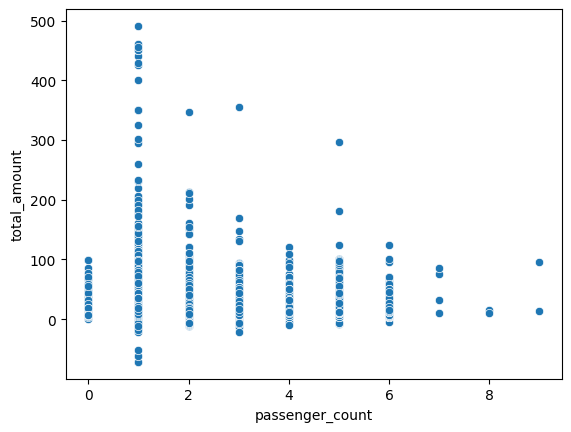

In [350]:
#Mengecek apakah ada korelasi jumlah penumpang dengan total_amount
sns.scatterplot(data = df, x= 'passenger_count', y = 'total_amount')

In [351]:
# mengecek unique value pada trip_type dan RatecodeID ketika payment_type null
nan_passsenger = df[df['passenger_count'].isna()]
listItem = []
for col in ['trip_type', 'RatecodeID']:
    listItem.append([col, nan_passsenger[col].nunique(), nan_passsenger[col].unique()])
tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Value'],
                          data=listItem)
tabel1Desc  

,Column Name,Number of Unique,Unique Value
0,trip_type,1,[1.0]
1,RatecodeID,1,[1.0]


* dapat disimpulkan dari pencarian diatas, bahwa kita akan melakukan fill missing value 
* Semua missing values pada kolom passenger_count penumpangnya adalah street hail type.
* lalu, semua missing values pada kolom passenger_count penumpangnya dikenai biaya standard rate, artinya passenger merupakan regular trip
* dari scatter plot diatas menunjukan jika **tidak ada korelasi** antara passenger_count dan total_amount, yang diasumsikan missing value merupakan kesalah driver dalam input. 
* jadi kita mengisi missing value dengan menggunakan modus dari passenger_count yakni 1 

In [352]:
# Fill NaN pada passenger_count
df.fillna({'passenger_count':1}, inplace=True)

In [353]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

### **C. Change Data Type**

Melakukan konverting data type sesuai dengan kebutuhan analisis 

Pada Kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` data type masih berupa object, dan kita akan rubah menjadi datetime() yang kita gunakan untuk analisis nantinya. 

In [354]:
# Konverting lpep_pickup_datetime , lpep_dropoff_datetime dari Object > datetime64
df["lpep_pickup_datetime"] = df["lpep_pickup_datetime"].astype('datetime64[s]')
df["lpep_dropoff_datetime"] = df["lpep_dropoff_datetime"].astype('datetime64[s]')

Pada Kolom `passenger_count` data type masih berupa **float**, dan kita akan rubah menjadi **int** untuk mempermudah analisis. 

In [355]:
# Casting df['passenger_count'] as int
df['passenger_count'] = df['passenger_count'].astype('int64')

In [356]:
print(f'Jumlah baris dan kolom di dataset df setelah fill missing value, konvert data type {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df setelah fill missing value, konvert data type (68211, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype        
---  ------                 --------------  -----        
 0   VendorID               68211 non-null  int64        
 1   lpep_pickup_datetime   68211 non-null  datetime64[s]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[s]
 3   store_and_fwd_flag     68211 non-null  object       
 4   RatecodeID             68211 non-null  float64      
 5   PULocationID           68211 non-null  int64        
 6   DOLocationID           68211 non-null  int64        
 7   passenger_count        68211 non-null  int64        
 8   trip_distance          68211 non-null  float64      
 9   fare_amount            68211 non-null  float64      
 10  extra                  68211 non-null  float64      
 11  mta_tax                68211 non-null

### **D. Anomalies dan Outlier Pada Data**

In [357]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,68211,68211,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000
mean,1.863028,2023-01-16 20:10:55,2023-01-16 20:29:01,1.109733,98.549735,138.429901,1.295847,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,21.789377,1.603495,1.020539,0.739349
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 11:59:47,2023-01-09 12:16:37,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:40:42,2023-01-17 08:56:38,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 15:52:30,2023-01-24 16:06:56,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,4.500000
std,0.343820,NaN,NaN,1.328991,61.244314,76.761311,0.950635,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,15.457115,1.011212,0.141837,1.219367


**Insight**
- Jika diidentifikasi lebih dalam ada nilai negatif dalam kolom `fare_amount`,`mta_tax`, `tip_amount`, `improvement_surcharge`,`total_amount`, dan `congestion_surcharge`. Data negatif pada kolom berikut sangatlah tidak mungkin terjadi. Ada Asumsi kesalahan dalam menginput.
- Data tahun yang terlihat tidak masuk akal, data set ini merupakan record di tahun 2023 tetapi dalam data terdapat data dari 2009.


### Handling negative value on every row

melihat data negatif dapat di identifikasi dari total amount saja, jika hasil total amount negatif maka semua data pada kolom `fare_amount`,`mta_tax`, `tip_amount`, `improvement_surcharge`,`total_amount`, dan `congestion_surcharge` juga memiliki nilai negatif.

In [358]:
# mengecek fare_amount yang negatif
df[df['fare_amount'] < 0 ]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2,0.17,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,3.0,1.0,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1,0.00,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,4.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1,0.64,-8.60,-1.0,-0.5,0.00,0.0,-1.0,-11.10,3.0,1.0,0.0
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1,0.77,-4.50,0.0,-0.5,0.00,0.0,-0.3,-5.30,4.0,1.0,0.0
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2,0.08,-3.70,0.0,-0.5,0.00,0.0,-1.0,-5.20,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64376,2,2023-01-04 15:11:00,2023-01-04 15:12:00,N,1.0,25,25,1,0.13,-27.96,0.0,0.0,3.00,0.0,1.0,-23.96,5.0,1.0,0.0
64487,2,2023-01-05 10:51:00,2023-01-05 11:20:00,N,1.0,116,151,1,2.22,-43.54,0.0,0.0,0.76,0.0,1.0,-41.78,5.0,1.0,0.0
65108,2,2023-01-10 10:00:00,2023-01-10 10:26:00,N,1.0,168,159,1,3.45,-17.38,0.0,0.0,0.26,0.0,1.0,-16.12,5.0,1.0,0.0
66459,2,2023-01-19 17:48:00,2023-01-19 17:52:00,N,1.0,166,166,1,0.38,-35.01,0.0,0.0,4.86,0.0,1.0,-29.15,5.0,1.0,0.0


In [359]:
# Mengecek apakah ada keterkaitan data value negatif dengan melihat duplikat pada subset kolom 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'
ValueNegatif = df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID'], keep= False)]
ValueNegatif

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2,0.17,3.0,0.0,0.5,0.0,0.0,1.0,4.5,3.0,1.0,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0,0.0
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1,0.00,3.0,0.0,0.5,0.0,0.0,1.0,4.5,4.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1,0.00,2.5,0.5,0.5,0.0,0.0,0.3,3.8,3.0,1.0,0.0
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,3.0,1.0,0.0
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1,0.15,3.7,1.0,0.5,0.0,0.0,1.0,6.2,3.0,1.0,0.0
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1,0.00,-10.0,0.0,0.0,0.0,0.0,-1.0,-11.0,4.0,2.0,0.0


Dengan mengecek duplikasi seperti diatas dapat disimpulkan jika negative value di setiap bari dengan subset kolom `fare_amount`,`mta_tax`, `tip_amount`, `improvement_surcharge`,`total_amount`, dan `congestion_surcharge` merupakan duplikasi data yang positif. Dapat diasumsikan bahwa data dengan value negatif merupakan pengulangan dari data yang value positif. Treatment yang dilakukan adalah mendrop data negatif.

In [360]:
# Melakukan drop negatif values pada fare amount
dropnegative = df[df['fare_amount'] < 0].index
df = df.drop(index = dropnegative)
df.shape

(68035, 19)

In [361]:
df.describe().round(2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68035.00,68035,68035,68035.00,68035.00,68035.00,68035.00,68035.00,68035.00,68035.00,68035.00,68035.00,68035.00,68035.00,68035.00,68035.00,68035.00,68035.00
mean,1.86,2023-01-16 20:17:13,2023-01-16 20:35:22,1.11,98.51,138.49,1.30,8.14,16.66,0.83,0.59,2.14,0.17,0.96,21.87,1.60,1.02,0.74
min,1.00,2009-01-01 20:21:27,2009-01-02 11:07:31,1.00,1.00,1.00,0.00,0.00,0.00,0.00,-0.50,0.00,0.00,-1.00,-4.25,1.00,1.00,0.00
25%,2.00,2023-01-09 12:11:06,2023-01-09 12:30:32,1.00,74.00,74.00,1.00,1.12,9.30,0.00,0.50,0.00,0.00,1.00,12.95,1.00,1.00,0.00
50%,2.00,2023-01-17 08:45:00,2023-01-17 09:00:08,1.00,75.00,138.00,1.00,1.85,13.50,0.00,0.50,1.60,0.00,1.00,17.94,1.00,1.00,0.00
75%,2.00,2023-01-24 15:52:00,2023-01-24 16:06:54,1.00,129.00,220.00,1.00,3.22,19.80,1.00,0.50,3.33,0.00,1.00,26.20,2.00,1.00,2.75
max,2.00,2023-02-01 03:10:05,2023-02-01 17:27:05,99.00,265.00,265.00,9.00,120098.84,490.00,12.50,2.75,222.22,36.05,1.00,491.00,5.00,2.00,4.50
std,0.34,NaN,NaN,1.33,61.22,76.76,0.95,585.86,13.42,1.27,0.38,3.05,1.10,0.17,15.39,1.01,0.14,1.22


Dari deskripsi diatas ternyata masih banyak data yang mengandung nilai negatif.

In [362]:
# mta_tax yang mengandung nilai negatif 
df[df['mta_tax'] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
30232,2,2023-01-16 03:39:38,2023-01-16 03:54:12,N,1.0,235,78,1,2.34,0.0,0.0,-0.5,0.0,0.0,-1.0,-1.50,2.0,1.0,0.0
30247,2,2023-01-16 04:11:30,2023-01-16 04:12:44,N,1.0,78,78,1,0.17,0.0,0.0,-0.5,0.0,0.0,-1.0,-1.50,2.0,1.0,0.0
36900,2,2023-01-19 13:49:39,2023-01-19 14:40:05,N,1.0,43,23,1,24.14,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.25,2.0,1.0,0.0


* terdapat 3 baris dengan mta_tax yang masing negatif karena hanya tiga data saja maka saya akan melakukan drop data

In [363]:
# Drop data negatif pada mta_tax
dropNegMTA = df[df['mta_tax']< 0].index
df = df.drop(index= dropNegMTA)
df.shape

(68032, 19)

In [364]:
# validasi
df[df['mta_tax']< 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


* data mta_tax yang negatif berhasil kita drop

In [365]:
# validasi berdasarkan statistik deskriptif
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68032.000000,68032,68032,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000
mean,1.862668,2023-01-16 20:17:12,2023-01-16 20:35:20,1.109463,98.512685,138.492900,1.295508,8.135232,16.664884,0.829801,0.591101,2.144729,0.170073,0.956531,21.870382,1.599247,1.020476,0.741295
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:10:56,2023-01-09 12:30:04,1.000000,74.000000,74.000000,1.000000,1.120000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.950000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:45:03,2023-01-17 09:00:30,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.940000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 15:52:22,2023-01-24 16:06:55,1.000000,129.000000,220.000000,1.000000,3.220000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.200000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,4.500000
std,0.344200,NaN,NaN,1.329966,61.218927,76.762348,0.950798,585.875058,13.423264,1.267548,0.382487,3.054331,1.101201,0.171346,15.387319,1.008802,0.141622,1.220380


* masalah pada data negatif sudah terhandle, sudah tidak ada data negatif lagi. 
* 0 adalah minimum values pada data fare amount. yang memungkinkan hal tersebut terjadi karena adanya promo atau cancel dari penumpang

### **Mengecek Column `passenger_count`**
Berdasarkan aturan jumlah maksimum penumpang yang diperbolehkan dalam taksi  menurut undang-undang adalah empat (4) dalam taksi empat (4) penumpang atau lima (5) penumpang dalam taksi lima (5) penumpang, kecuali penumpang berusia di bawah tujuh (7) tahun dan digendong di pangkuan penumpang dewasa yang duduk di belakang.
Source : https://www.nyc.gov/assets/tlc/downloads/pdf/rule_book_current_chapter_54.pdf
    

In [366]:
# Mengecek distribusi passenger_count
x = df['passenger_count'].value_counts()
for i, count in x.items():
    percentage = (count / len(df)) * 100
    print(f'{i} passenger sebanyak {count} : {percentage:.2f}%')

1 passenger sebanyak 58493 : 85.98%
2 passenger sebanyak 5061 : 7.44%
5 passenger sebanyak 1768 : 2.60%
6 passenger sebanyak 1053 : 1.55%
3 passenger sebanyak 951 : 1.40%
4 passenger sebanyak 362 : 0.53%
0 passenger sebanyak 336 : 0.49%
7 passenger sebanyak 4 : 0.01%
9 passenger sebanyak 2 : 0.00%
8 passenger sebanyak 2 : 0.00%


- Passenger count paling banyak dalam perjalanan taxi 1 passenger
- terdapat jumlah penumpang 0 yang dimana ini tidak masuk akal, maka dari itu kita perlu melakukan treatment dengan mengganti passenger_count 0 menjadi modus nya.

In [367]:
# Mereplace value 0 menjadi 1
df["passenger_count"].replace(0, 1, inplace=True)

In [368]:
display(df[df['passenger_count']> 7], df[df['passenger_count'] < 1 ])

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
11478,2,2023-01-06 21:10:08,2023-01-06 21:10:11,N,5.0,265,265,9,0.00,90.00,0.0,0.0,6.0,0.0,0.3,96.30,1.0,2.0,0.0
26612,2,2023-01-14 03:09:48,2023-01-14 03:09:50,N,5.0,95,95,8,0.12,8.90,0.0,0.0,5.0,0.0,1.0,14.90,1.0,2.0,0.0
29824,2,2023-01-15 19:21:14,2023-01-15 19:21:17,N,5.0,75,75,8,0.00,8.00,0.0,0.0,1.0,0.0,1.0,10.00,1.0,2.0,0.0
44307,2,2023-01-22 23:40:13,2023-01-22 23:40:21,N,5.0,83,83,9,0.00,9.99,0.0,0.0,2.2,0.0,1.0,13.19,1.0,2.0,0.0


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


Kesimpulan :
- 336 data bersisi < 1 penumpang
- 4 data contains > 7 penumpang
- Sudah tidak ada lagi data yang memiliki passenger_count 0

Berdasarkan aturan diatas ada jumlah penumpang sangat masuk akal jika lebih dari 7 yang tidak masuk akal adalah tidak adanya penumpang dalam perjalanan taksi. perlu digaris bawahi passenger_count dari kesimpulan diatas dapat mengakibatkan data memiliki outlier



### **Checking an Outliers**

In [369]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68032.000000,68032,68032,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000,68032.000000
mean,1.862668,2023-01-16 20:17:12,2023-01-16 20:35:20,1.109463,98.512685,138.492900,1.300447,8.135232,16.664884,0.829801,0.591101,2.144729,0.170073,0.956531,21.870382,1.599247,1.020476,0.741295
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:10:56,2023-01-09 12:30:04,1.000000,74.000000,74.000000,1.000000,1.120000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.950000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:45:03,2023-01-17 09:00:30,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.940000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 15:52:22,2023-01-24 16:06:55,1.000000,129.000000,220.000000,1.000000,3.220000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.200000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,4.500000
std,0.344200,NaN,NaN,1.329966,61.218927,76.762348,0.946643,585.875058,13.423264,1.267548,0.382487,3.054331,1.101201,0.171346,15.387319,1.008802,0.141622,1.220380


In [370]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

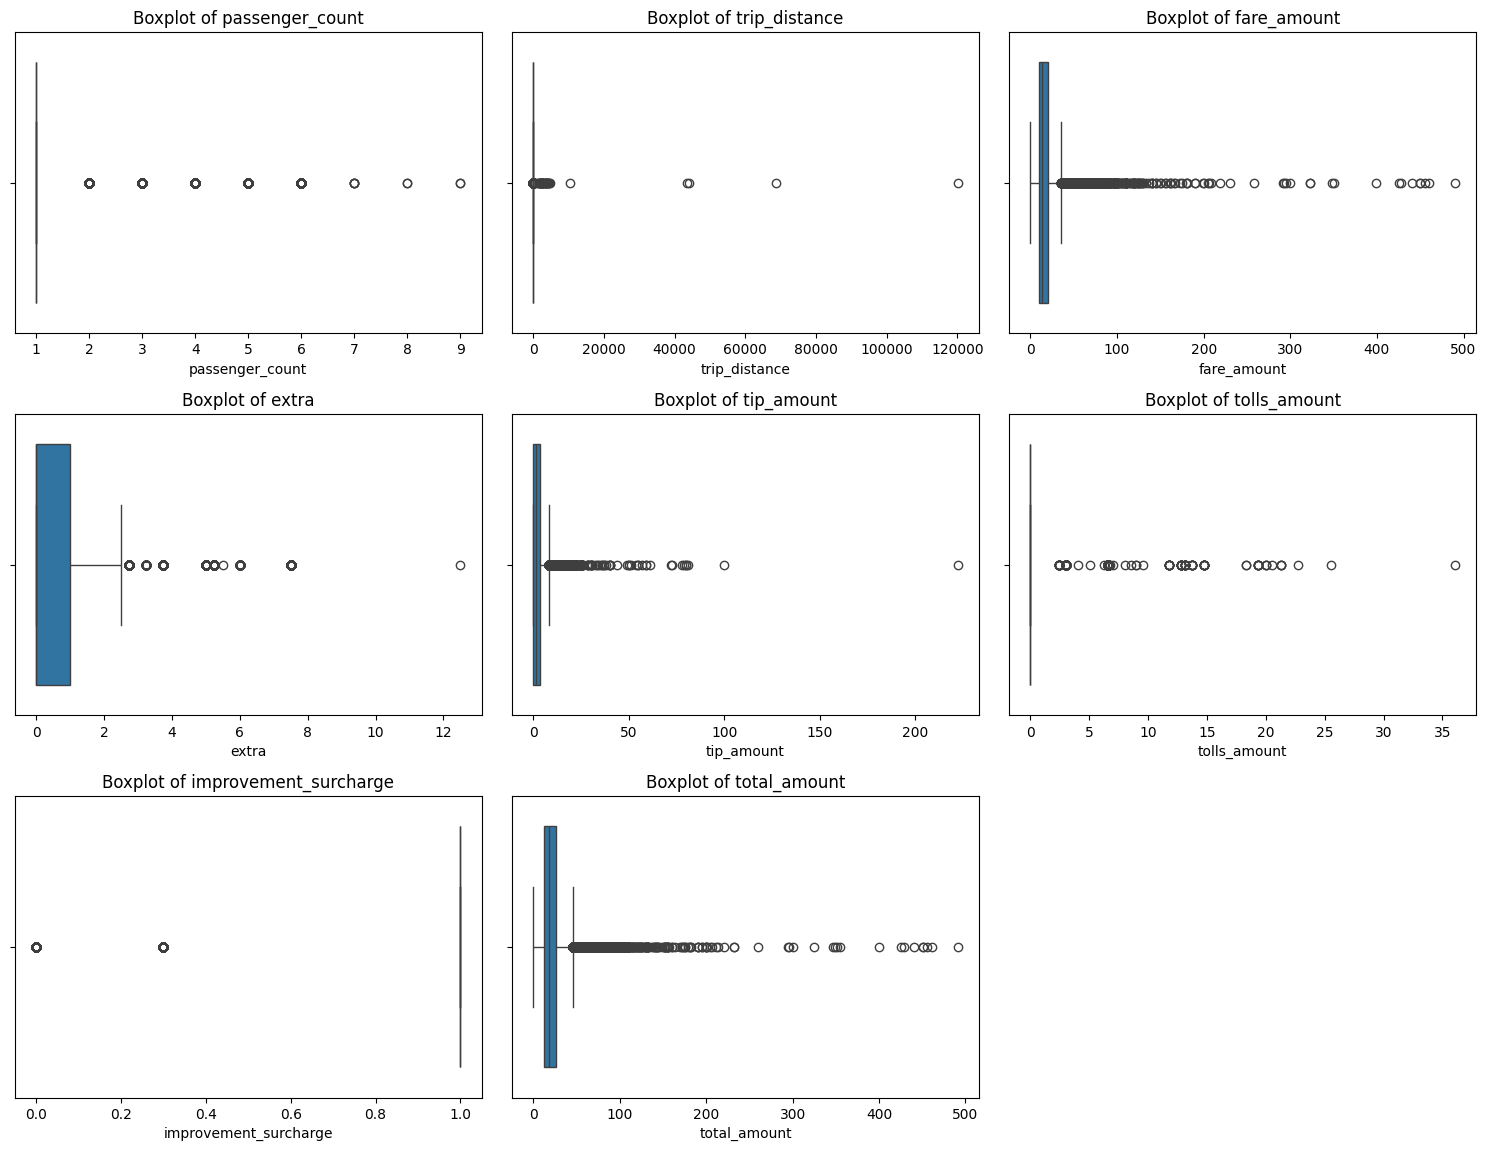

In [371]:
col_angka = ['passenger_count', 'trip_distance', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']

# Box Plott untuk mengecek outlier pada kolom numeric 
plt.figure(figsize=(15, 15))
for i, column in enumerate(col_angka, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column], orient= 'h')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

dari box plot diatas dapat disimpulkan jika ada data outlier yang tidak masuk akal pada `trip_distance`

#### **Mengecek outlier pada `Trip_distance`**

Dari boxplot trip_distance diatas terdapat trip yang hampir berjarak  mil

 Banyaknya Outlier : 5746


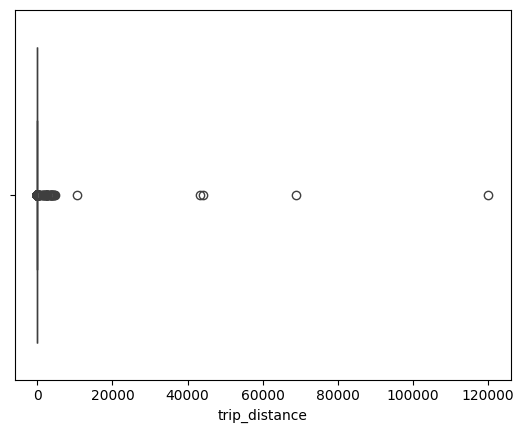

In [372]:
# Boxplotting pada kolom trip distance
sns.boxplot(data = df, x = 'trip_distance', orient= 'H')

# mengecek banyaknya outlier
def distance_outlier(df, col): 
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return (df[col] < lower_bound) | (df[col] > upper_bound)

trip_distance_outlier = df[distance_outlier(df, 'trip_distance')]
print(f' Banyaknya Outlier : {len(trip_distance_outlier)}')

In [373]:
# Checking minimum and maximum of trip distance
min_value = df['trip_distance'].min()
max_value = df['trip_distance'].max()

print("Minimal Trip Distance :", min_value)
print("Maximal Trip Distance :", max_value)

Minimal Trip Distance : 0.0
Maximal Trip Distance : 120098.84


In [374]:
# Mengecek semua data yang trip_distance 0.00
df[df['trip_distance'] == 0.00]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1,0.0,7.20,1.0,0.5,1.94,0.00,1.0,11.64,1.0,1.0,0.00
58,2,2023-01-01 00:57:15,2023-01-01 01:00:15,N,1.0,75,75,1,0.0,4.40,1.0,0.5,1.38,0.00,1.0,8.28,1.0,1.0,0.00
99,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,1,0.0,20.00,0.0,0.0,0.00,0.00,1.0,21.00,1.0,2.0,0.00
107,2,2023-01-01 01:11:13,2023-01-01 01:11:36,N,1.0,7,7,1,0.0,3.00,1.0,0.5,9.00,0.00,1.0,14.50,1.0,1.0,0.00
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1.0,264,264,1,0.0,3.00,1.0,0.5,21.50,0.00,0.3,26.30,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68014,2,2023-01-30 13:29:00,2023-01-30 14:15:00,N,1.0,14,75,1,0.0,51.12,0.0,0.0,1.17,6.55,1.0,62.59,5.0,1.0,2.75
68112,2,2023-01-31 08:36:00,2023-01-31 08:51:00,N,1.0,41,75,1,0.0,15.56,0.0,0.0,0.00,0.00,1.0,16.56,5.0,1.0,0.00
68136,1,2023-01-31 11:10:20,2023-01-31 11:45:20,N,1.0,42,132,1,0.0,70.50,0.0,0.5,10.80,0.00,1.0,84.80,5.0,1.0,2.00
68161,2,2023-01-31 13:53:00,2023-01-31 14:17:00,N,1.0,7,145,1,0.0,23.43,0.0,0.0,4.89,0.00,1.0,29.32,5.0,1.0,0.00


* Terdapat sebanyak 3281 data yang memiliki trip_distance 0 tidak masuk akal. Hal ini memungkinkan jika kondisi trip yang terjadi mengalami error dalam input data.
* alangkah sebaiknya jika drop data untuk keperluan analisis 

In [375]:
# Delete all with 0 mile distance
rows_to_drop = df[df['trip_distance'] == 0.00].index
df = df.drop(index = rows_to_drop)
df.shape

(64751, 19)

NOTES : 

* Kombinasi pick up dan drop off terlama di Kota New York akan melibatkan perjalanan dari titik paling selatan Staten Island ke titik paling utara Bronx, atau sebaliknya. Ini akan menempuh jarak sekitar 46 mil, tergantung pada rute spesifik yang diambil.

* ada hal yang perlu diperhatikan jika jarak suatu trip juga dapat dipengaruhi dari rute yang diambil, atau kemacetan pada saat trip terjadi.

In [376]:
# Mengkonversi Panjang trip berdasarkan level 
def distance_level(row):
    if (row > 0) & (row <= 2):
        val = "short"
    elif (row > 2) & (row <= 5):
        val = "medium"
    elif (row > 5) & (row <= 46):
        val = "long"
    else:
        val = "very_long"
    return val

# membuat kolum trip_level
df['trip_level'] = df['trip_distance'].apply(distance_level)

* short = trip singkat yang mencakup beberapa blok kota atau kurang antara 0,1 hingga 2 mil.
* medium = trip medium mencakup beberapa blok kota hingga beberapa mil, mungkin memiliki jarak perjalanan berkisar antara 2 hingga 5 mil.
* long = trip yang mencakup 5 sampai 46 mil (jarak maksimal). 
* very_long = trip yang melebihi 46 mil (jarak maksimal). 

In [377]:
# Mengecek trip level very_long 
very_long_trip = df[df['trip_level']== 'very_long']
very_long_trip.shape

(46, 20)

* Berdasarkan trip levelnya yang melebihi 46 mil sebanyak 45 data. Untuk kepentingan analisis maka kita harus drop data tersebut. 

In [378]:
# Delete all too long trips
droprows_vLong = df[df['trip_level'] == 'very_long'].index
df = df.drop(index = droprows_vLong)
df.shape


(64705, 20)

 Banyaknya Outlier : 5494


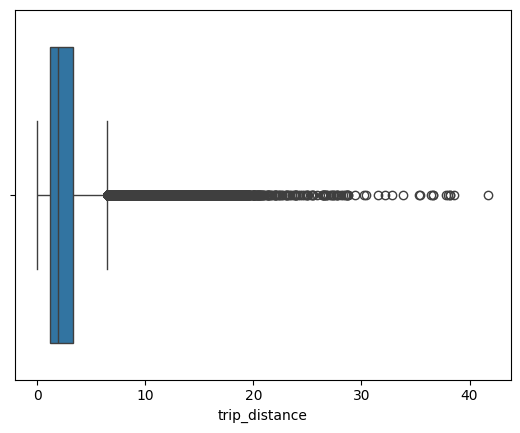

In [379]:
# Mengecek kembali trip distance 
sns.boxplot(data = df, x = 'trip_distance')

def distance_outlier(df, col): 
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return (df[col] < lower_bound) | (df[col] > upper_bound)

trip_distance_outlier = df[distance_outlier(df, 'trip_distance')]
print(f' Banyaknya Outlier : {len(trip_distance_outlier)}')

* Setelah melakukan penggolongan pada trip_level, masih jelas terlihat ada outlier namun tidak se extreme sebelumnya.

In [380]:
# Mengecek data max pada trip distance
round(df.describe(),2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,64705.00,64705,64705,64705.00,64705.00,64705.00,64705.00,64705.00,64705.00,64705.00,64705.00,64705.00,64705.00,64705.00,64705.00,64705.00,64705.00,64705.00
mean,1.88,2023-01-16 20:40:12,2023-01-16 20:58:18,1.08,97.45,138.27,1.31,2.81,16.44,0.86,0.58,2.20,0.16,0.96,21.74,1.60,1.01,0.77
min,1.00,2009-01-01 20:21:27,2009-01-02 11:07:31,1.00,3.00,1.00,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
25%,2.00,2023-01-09 12:24:00,2023-01-09 12:40:00,1.00,74.00,74.00,1.00,1.22,9.30,0.00,0.50,0.00,0.00,1.00,12.96,1.00,1.00,0.00
50%,2.00,2023-01-17 09:16:10,2023-01-17 09:32:22,1.00,75.00,138.00,1.00,1.94,13.00,0.00,0.50,1.80,0.00,1.00,17.90,1.00,1.00,0.00
75%,2.00,2023-01-24 16:06:32,2023-01-24 16:22:26,1.00,116.00,220.00,1.00,3.33,19.75,1.00,0.50,3.41,0.00,1.00,26.05,2.00,1.00,2.75
max,2.00,2023-02-01 03:10:05,2023-02-01 17:27:05,99.00,265.00,265.00,8.00,41.74,455.00,12.50,1.50,222.22,36.05,1.00,456.00,5.00,2.00,2.75
std,0.33,NaN,NaN,1.31,60.05,76.51,0.96,2.74,12.23,1.28,0.36,3.00,1.05,0.17,14.39,1.01,0.11,1.23


#### **Mengecek Kolum `RatecodeID`**
This column contains information about the final rate code at the end of the trip. Rate code should be in range 1 up to 6.

1. Standard rate : This trip type indicates a regular taxi trip within New York City that is subject to the standard fare structure.

2. JFK : This trip type indicates that the trip originated from or is going to John F. Kennedy International Airport (JFK).

3. Newark : The trip originated from or is going to Newark Liberty International Airport. Similar to JFK trips.

4. Nassau or Westchester : This trip type suggests that the trip was to or from Nassau County or Westchester County, which are suburban areas neighboring New York City.

5. Negotiated fare : A trip with a negotiated fare indicates that the fare for the trip was pre-negotiated or agreed upon between the driver and the passenger.

6. Group ride : A trip classified as a group ride indicates that multiple passengers who are not together as a group are sharing the same ride.

In [381]:
# Checking baris dengan code 99 pada RatecodeID.
df[df['RatecodeID'] > 6]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_level
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,1.0,0.0,medium
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,1.0,0.0,medium
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,1.0,0.0,long
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,1.0,0.0,medium
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,1.0,0.0,long
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0,short
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0,short
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,1.0,0.0,long
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0,short
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,1.0,0.0,long


jika diidentifikasi Ratecode hanya memilki rentang 1-6 saja sisanya dapat diasumsikan merupakan kesalahan input oleh driver, maka dari itu kita perlu treatment drop row 10 data yang memiliki rate code 99, 

selain itu alasan untuk melakukan drop adalah pada rate codeid 99 semua passenger countnya hanya 1 saja, sangat tidak mungkin jika kita masukan rate code id 6 = Group ride

In [382]:
# Deleting data anomali pada RatecodeID
dropRC = df[df['RatecodeID'] > 6].index
df = df.drop(index = dropRC)
df.shape

(64695, 20)

In [383]:
df['RatecodeID'].value_counts()

RatecodeID
1.0    63531
5.0      963
2.0      131
4.0       50
3.0       20
Name: count, dtype: int64

In [384]:
df['mta_tax'].value_counts()

mta_tax
0.5    52056
1.5     7622
0.0     5001
1.0       16
Name: count, dtype: int64

Kolom `mta_tax` merupakan kolom yang pajak MTA sebesar $0,50 yang terotomatisasi ketika perjalanan akan dimulai berdasarkan tarif meteran yang digunakan, dan memiliki keliapatan 0,5. 

# **3. Adding New Column**

Pada bagian ini untuk memamahami context data lebih lanjut diperlukan data tambahan. Data tambahan ini juga diharapkan mampu memberikan kedalaman pada analisis sesuai dengan problem yang telah disusun sebelumnya
- Menambahkan kolom Lokasi mengacu pada tabel kode zona taksi
- Hitung durasi setiap perjalanan menggunakan perbedaan antara waktu lpep_pickup_datetime dan lpep_dropoff_datetime.
- Identifikasi bulan, hari dalam seminggu, dan jam untuk setiap perjalanan. Kemudian mengklasifikasikan apakah perjalanan tersebut terjadi pada hari kerja, akhir pekan, atau hari libur.

In [385]:
# Creating a new column related to date to facilitate data inspection
# Pick Up time
df['pu_year'] = df['lpep_pickup_datetime'].dt.strftime('%Y')
df['pu_month'] = df['lpep_pickup_datetime'].dt.strftime('%B')
df['pu_week'] = df['lpep_pickup_datetime'].dt.strftime('%U')
df['pu_day'] = df['lpep_pickup_datetime'].dt.strftime('%A')
df['pu_date'] = df['lpep_pickup_datetime'].dt.strftime('%d')
df['pu_hour'] = df['lpep_pickup_datetime'].dt.strftime('%H')

# Duration time
df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df['durations_minute'] = df['duration'].apply(lambda x: x.total_seconds()/60).round(2)
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,trip_level,pu_year,pu_month,pu_week,pu_day,pu_date,pu_hour,duration,durations_minute
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1,2.58,14.9,...,2.75,medium,2023,January,01,Sunday,01,00,0 days 00:11:01,11.02
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1,1.81,10.7,...,0.00,short,2023,January,01,Sunday,01,00,0 days 00:06:46,6.77
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1,1.30,6.5,...,0.00,short,2023,January,01,Sunday,01,00,0 days 00:05:49,5.82
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1,1.10,6.0,...,0.00,short,2023,January,01,Sunday,01,00,0 days 00:05:58,5.97
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1,2.78,17.7,...,2.75,medium,2023,January,01,Sunday,01,00,0 days 00:17:33,17.55


In [386]:
df['pu_year'].value_counts()

pu_year
2023    64692
2022        2
2009        1
Name: count, dtype: int64

In [387]:
df['pu_month'].value_counts()

pu_month
January     64692
December        2
February        1
Name: count, dtype: int64

In [388]:
df[(df['pu_month']!= 'January') & (df['pu_year'] != 2023)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,trip_level,pu_year,pu_month,pu_week,pu_day,pu_date,pu_hour,duration,durations_minute
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1.0,7,56,1,5.37,16.0,...,0.00,long,2022,December,49,Friday,09,14,0 days 00:11:37,11.62
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1.0,260,164,1,5.48,25.5,...,2.75,long,2022,December,49,Friday,09,14,0 days 00:37:24,37.40
25100,2,2023-02-01 03:10:05,2023-02-01 03:40:35,N,5.0,82,198,2,4.58,28.0,...,0.00,medium,2023,February,05,Wednesday,01,03,0 days 00:30:30,30.50


In [389]:
dropdata = df[(df['pu_month']!= 'January') & (df['pu_year'] != 2023)].index
df = df.drop(index= dropdata)
df.shape

(64692, 28)

Ketiga data ini sudah diluar dari jangkauan analisis, data hanya dibatasi pada tahun 2023 dan dibulan januari saja selebihnya kita tidak membutuhkan data diluar ini untuk analisis

**`durations_minute`**

Waktu durasi perjalanan dapat sangat bervariasi berdasarkan keadaan spesifik perjalanan, kondisi lalu lintas, jarak yang ditempuh, dan faktor lainnya, ditambah lagi New york merupakan kota terpadat, jadi variabel diatas sangat tentunya sangat berpengaruh. 

Walaupun tidak ada batasan maksimum durasi perjalanan taksi yang ditetapkan secara universal, Taksi di nilai harus memiliki perjalanan yang praktis. Perjalanan taksi yang berlangsung beberapa jam mungkin menunjukkan kesalahan data, anomali, atau situasi diluar semua hal diatas. adanya trip durasi yang melebihi batas wajar bisa di lihat dari : 

* Salah dalam menginput data entry dalam pick up dan drop off
* seringnya terjadi pemberhentian saat trip berjalan 
* driver lupa mematikan argo walaupun tripnya sudah selesai

Perjalanan terjauh yang mungkin dari Staten Island sampai Bronx di estimasikan sekitar 1 sampai 2.5 jam berdasarkan Google Maps. Maka dari itu untuk mendapatkan analisa yang komperehensif maka kita harus membatasi durasi dalam trip dari jarak yang paling terjauh. Keputuasan Akhirnya adalah kita akan menghapus perjalanan yang lebih dari 3 jam.  




In [390]:
# Mengecek apakah dalam duration minute masih 0 
df[df['durations_minute'] == 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,trip_level,pu_year,pu_month,pu_week,pu_day,pu_date,pu_hour,duration,durations_minute
7159,1,2023-01-05 07:54:34,2023-01-05 07:54:34,N,1.0,42,42,1,1.90,12.8,...,0.0,short,2023,January,01,Thursday,05,07,0 days,0.0
13787,2,2023-01-08 02:15:56,2023-01-08 02:15:56,N,1.0,264,264,1,0.04,2.5,...,0.0,short,2023,January,02,Sunday,08,02,0 days,0.0
15762,2,2023-01-09 10:16:27,2023-01-09 10:16:27,N,5.0,40,264,1,0.09,17.0,...,0.0,short,2023,January,02,Monday,09,10,0 days,0.0
42986,2,2023-01-22 10:38:23,2023-01-22 10:38:23,N,5.0,264,264,1,0.18,20.0,...,0.0,short,2023,January,04,Sunday,22,10,0 days,0.0


* Trip dengan 0 duration sangat tidak wajar maka dari itu perlu dihapus 

In [391]:
# Drop kolom dengan 0 duration time
drop_minute0 = df[df['durations_minute'] == 0].index
df = df.drop(index = drop_minute0)
df.shape

(64688, 28)

In [392]:
# Membuat kolom durasi dalam jam 
df['durations_hour'] = (df['durations_minute'] / 60).round(2)

**sekarang mari kita lihat korelasi dengan scatteplot dari duration hour dan trip distance yang terjadi**

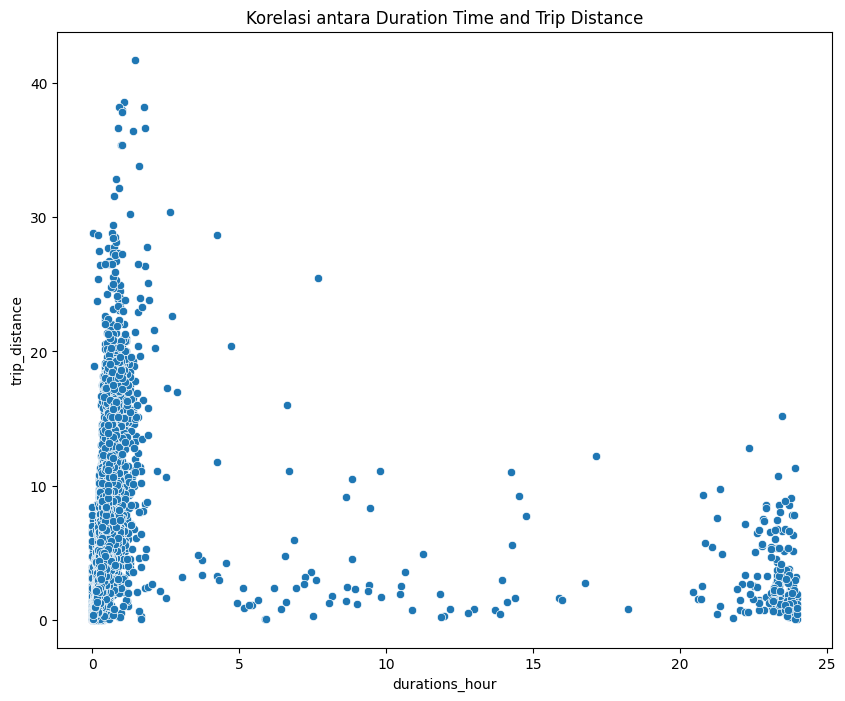

In [393]:
# Mengecek korelasi antara duration hour dan trip distance
plt.figure(figsize= (10,8))
sns.scatterplot(data= df, x= 'durations_hour', y= 'trip_distance')
plt.title('Korelasi antara Duration Time and Trip Distance')
plt.show()

* Dari scatterplot diatas bisa dilihat jika adanya korelasi postif antara durasi dan trip distance. **Semakin jauh jarak trip semakin lama durasi tripnya pula**
* Jadi kesimpulannya durasi yang tidak wajar tidak perlu diikutkan. 

3062

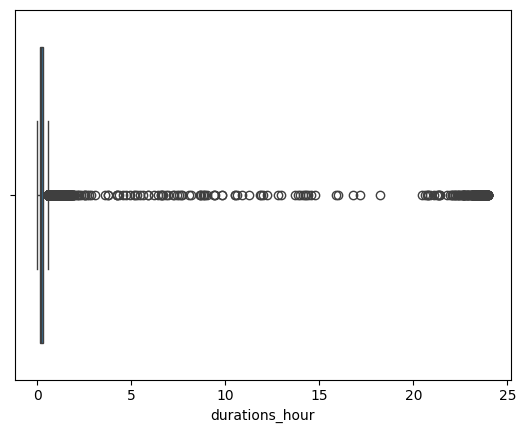

In [394]:
# Checking durations_hour distribution and outliers 
sns.boxplot(data = df, x = 'durations_hour')

def duration_outlier(df, col): 
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return (df[col] < lower_bound) | (df[col] > upper_bound)

trip_duration_outlier = df[duration_outlier(df, 'durations_hour')]
len(trip_duration_outlier)

* jika dilihat dari boxpplot diatas, distribusi data terlihat tidak normal dan banyak outlier. untuk menghindari hasil analisis yang rancu maka kita perlu handle outlier se masuk akal mungkin. dengan menghapus durasi trip lebih dari 3 jam dari hasil diskusi diatas. 

In [395]:
df[df['durations_hour']> 3]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_level,pu_year,pu_month,pu_week,pu_day,pu_date,pu_hour,duration,durations_minute,durations_hour
49,2,2023-01-01 00:23:04,2023-01-01 23:18:32,N,1.0,255,48,1,8.55,47.8,...,long,2023,January,01,Sunday,01,00,0 days 22:55:28,1375.47,22.92
108,2,2023-01-01 01:53:59,2023-01-02 00:00:00,N,1.0,260,223,1,2.64,14.9,...,medium,2023,January,01,Sunday,01,01,0 days 22:06:01,1326.02,22.10
118,2,2023-01-01 01:25:46,2023-01-02 00:29:15,N,1.0,129,37,1,6.53,31.0,...,long,2023,January,01,Sunday,01,01,0 days 23:03:29,1383.48,23.06
207,2,2023-01-01 03:12:42,2023-01-02 02:03:43,N,5.0,129,129,1,0.72,20.0,...,short,2023,January,01,Sunday,01,03,0 days 22:51:01,1371.02,22.85
262,2,2023-01-01 04:03:36,2023-01-02 03:31:50,N,1.0,65,37,5,3.61,20.5,...,medium,2023,January,01,Sunday,01,04,0 days 23:28:14,1408.23,23.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62653,2,2023-01-31 13:57:30,2023-02-01 10:49:04,N,1.0,244,43,3,5.74,31.0,...,long,2023,January,05,Tuesday,31,13,0 days 20:51:34,1251.57,20.86
62762,2,2023-01-31 15:21:47,2023-02-01 00:00:00,N,1.0,92,64,2,9.15,39.4,...,long,2023,January,05,Tuesday,31,15,0 days 08:38:13,518.22,8.64
63105,2,2023-01-31 17:45:46,2023-02-01 17:27:05,N,1.0,43,151,1,0.75,5.8,...,short,2023,January,05,Tuesday,31,17,0 days 23:41:19,1421.32,23.69
63279,2,2023-01-31 18:22:24,2023-02-01 00:00:00,N,1.0,82,82,1,1.46,10.7,...,short,2023,January,05,Tuesday,31,18,0 days 05:37:36,337.60,5.63


In [396]:
# Drop data dengan durasi trip lebih dari 3 jam
drop_duration = df[df['durations_hour'] > 3].index
df = df.drop(index = drop_duration)
df.shape

(64439, 29)

2813

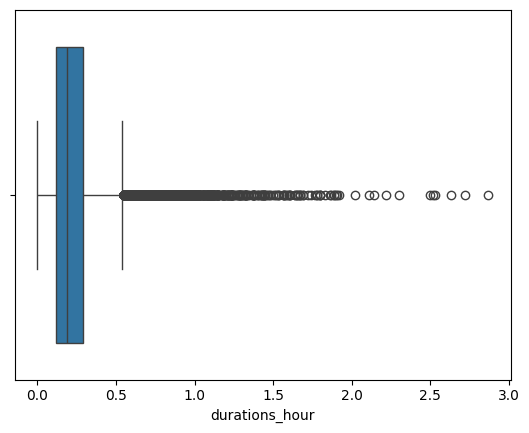

In [397]:
# Mengecek distribusi dan outliers durations_hour 
sns.boxplot(data = df, x = 'durations_hour')

def duration_outlier(df, col): 
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return (df[col] < lower_bound) | (df[col] > upper_bound)

trip_duration_outlier = df[duration_outlier(df, 'durations_hour')]
len(trip_duration_outlier)

* boxplot diatas menunjukkan bahwa trip sebagian besar kurang dari 0,5 jam. Bahkan setelah menghapus semua durasi yang tidak masuk akal alias terlalu lama, ternyata masih banyak outlier pada durasi trip. Hal ini menunjukkan bahwa distribusi durasi jam tidak normal.
* tidak hanya itu terdapat trip durasi yang masih dibawah 1 menit, data ini sangatlah tidak umum. Hal tersebut dapat terjadi jika ada kesalahan dalam melakukan input maupun terjadi pencancelan dalam trip taksi dan misalnya ada orderan yang trip level tergolong long tetapi memiliki dration trip dibawah satu menit, dapat diartikan driver lupa dalam menyalakan argo. 

In [398]:
# Mengecek durasi waktu minimaal
df['durations_minute'].describe()

count    64439.000000
mean        13.696245
std          9.743454
min          0.020000
25%          7.380000
50%         11.400000
75%         17.200000
max        172.480000
Name: durations_minute, dtype: float64

* Dari describe data pada kolom duration menit diatas, alangkah sebaiknya kita melakukan treatmen drop supaya data dapat dianalisa secara komperehensif dan masuk akal 

In [399]:
# Mengecek data dengan values dibawah 1 menit 
df[df['durations_minute'] < 1]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_level,pu_year,pu_month,pu_week,pu_day,pu_date,pu_hour,duration,durations_minute,durations_hour
35,1,2023-01-01 00:41:53,2023-01-01 00:41:58,N,1.0,83,83,1,6.70,3.0,...,long,2023,January,01,Sunday,01,00,0 days 00:00:05,0.08,0.00
104,2,2023-01-01 01:11:01,2023-01-01 01:11:06,N,5.0,179,179,2,0.01,190.0,...,short,2023,January,01,Sunday,01,01,0 days 00:00:05,0.08,0.00
146,2,2023-01-01 02:03:52,2023-01-01 02:03:57,N,1.0,169,169,2,0.01,3.0,...,short,2023,January,01,Sunday,01,02,0 days 00:00:05,0.08,0.00
163,2,2023-01-01 01:59:48,2023-01-01 01:59:51,N,5.0,36,36,2,0.09,100.0,...,short,2023,January,01,Sunday,01,01,0 days 00:00:03,0.05,0.00
195,1,2023-01-01 03:00:27,2023-01-01 03:00:54,N,3.0,251,251,1,4.90,23.0,...,medium,2023,January,01,Sunday,01,03,0 days 00:00:27,0.45,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63359,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3,0.05,3.0,...,short,2023,January,05,Tuesday,31,18,0 days 00:00:13,0.22,0.00
63486,1,2023-01-31 19:17:15,2023-01-31 19:17:24,N,1.0,7,7,1,5.90,3.0,...,long,2023,January,05,Tuesday,31,19,0 days 00:00:09,0.15,0.00
63545,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2,0.08,3.0,...,short,2023,January,05,Tuesday,31,19,0 days 00:00:28,0.47,0.01
63810,2,2023-01-31 22:03:44,2023-01-31 22:03:56,N,5.0,74,74,2,7.84,50.0,...,long,2023,January,05,Tuesday,31,22,0 days 00:00:12,0.20,0.00


* Pengecekan ada berapa data yang memiliki durasi trip dibawah 1 menit, ternyata terdapat 500 baris yang memiliki durasi trip dibawah 1 menit, dari sini kita bisa melakukan treatment drop terhadap data, karena kita memiliki threshold hanya 1 menit saja minimal perjalan yang bisa masu. Kurang dari tersebut, kita asumsikan ada kesalahan dalam sistem ataupun saat data entry yang sudah dijelaskan daiatas.

In [400]:
# melakukan drop data durasi trip dibawah 1 menit
df = df[df['durations_minute'] >= 1]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_level,pu_year,pu_month,pu_week,pu_day,pu_date,pu_hour,duration,durations_minute,durations_hour
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1,2.58,14.90,...,medium,2023,January,01,Sunday,01,00,0 days 00:11:01,11.02,0.18
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1,1.81,10.70,...,short,2023,January,01,Sunday,01,00,0 days 00:06:46,6.77,0.11
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1,1.30,6.50,...,short,2023,January,01,Sunday,01,00,0 days 00:05:49,5.82,0.10
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1,1.10,6.00,...,short,2023,January,01,Sunday,01,00,0 days 00:05:58,5.97,0.10
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1,2.78,17.70,...,medium,2023,January,01,Sunday,01,00,0 days 00:17:33,17.55,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,N,1.0,75,186,1,3.92,20.72,...,medium,2023,January,05,Tuesday,31,21,0 days 00:18:00,18.00,0.30
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1,2.14,4.41,...,medium,2023,January,05,Tuesday,31,22,0 days 00:08:00,8.00,0.13
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1,3.44,16.53,...,medium,2023,January,05,Tuesday,31,23,0 days 00:16:00,16.00,0.27
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1,3.03,14.98,...,medium,2023,January,05,Tuesday,31,23,0 days 00:18:00,18.00,0.30


Adding Additional dataset : Taxi Zone Dataset
- Lokasi penjemputan dan pengantaran diisi dengan angka yang berkisar antara 1 hingga 263. Angka-angka ini sesuai dengan zona taksi.

Source: https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf

In [401]:
# Adding New Dataset Zone
df_zone = pd.read_csv('taxi+_zone_lookup.csv')
df_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [402]:
# menggabungkan data frame awal dengan dataset berdasarkan zona
merged_df = df.merge(df_zone, left_on='PULocationID', right_on='LocationID', how='inner')
merged_df


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pu_day,pu_date,pu_hour,duration,durations_minute,durations_hour,LocationID,Borough,Zone,service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1,2.58,14.90,...,Sunday,01,00,0 days 00:11:01,11.02,0.18,166,Manhattan,Morningside Heights,Boro Zone
1,2,2023-01-01 00:01:31,2023-01-01 00:16:02,N,1.0,166,244,1,2.48,16.30,...,Sunday,01,00,0 days 00:14:31,14.52,0.24,166,Manhattan,Morningside Heights,Boro Zone
2,2,2023-01-01 00:53:09,2023-01-01 01:13:35,N,1.0,166,250,5,9.01,37.30,...,Sunday,01,00,0 days 00:20:26,20.43,0.34,166,Manhattan,Morningside Heights,Boro Zone
3,1,2023-01-01 01:45:19,2023-01-01 01:47:57,N,1.0,166,166,1,0.60,4.00,...,Sunday,01,01,0 days 00:02:38,2.63,0.04,166,Manhattan,Morningside Heights,Boro Zone
4,2,2023-01-01 01:34:07,2023-01-01 01:52:34,N,1.0,166,229,2,5.13,25.40,...,Sunday,01,01,0 days 00:18:27,18.45,0.31,166,Manhattan,Morningside Heights,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63934,2,2023-01-19 04:50:00,2023-01-19 05:17:00,N,1.0,229,132,1,17.27,77.00,...,Thursday,19,04,0 days 00:27:00,27.00,0.45,229,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone
63935,2,2023-01-20 04:03:00,2023-01-20 04:24:00,N,1.0,239,138,1,8.96,39.13,...,Friday,20,04,0 days 00:21:00,21.00,0.35,239,Manhattan,Upper West Side South,Yellow Zone
63936,2,2023-01-22 06:57:00,2023-01-22 07:40:00,N,1.0,239,132,1,18.67,77.00,...,Sunday,22,06,0 days 00:43:00,43.00,0.72,239,Manhattan,Upper West Side South,Yellow Zone
63937,2,2023-01-25 11:26:00,2023-01-25 11:35:00,N,1.0,240,265,1,3.87,26.03,...,Wednesday,25,11,0 days 00:09:00,9.00,0.15,240,Bronx,Van Cortlandt Park,Boro Zone


### **Melakukan rechecking Missing Values setelah penambahan data**

In [403]:
merged_df.isna().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                 0
congestion_surcharge      0
trip_level                0
pu_year                   0
pu_month                  0
pu_week                   0
pu_day                    0
pu_date                   0
pu_hour                   0
duration                  0
durations_minute          0
durations_hour            0
LocationID                0
Borough                   0
Zone                     22
service_zone             37
dtype: int64

Dari missing values diatas dapat diidentifikasi berdasarkan LocationID memiliki rentang data **1 - 263** saja, mari kita lihat apakah ada data setelah digabung yang masih memiliki locationID lebih dari 263 

In [404]:
merged_df[merged_df['LocationID'] > 263].count()

VendorID                 37
lpep_pickup_datetime     37
lpep_dropoff_datetime    37
store_and_fwd_flag       37
RatecodeID               37
PULocationID             37
DOLocationID             37
passenger_count          37
trip_distance            37
fare_amount              37
extra                    37
mta_tax                  37
tip_amount               37
tolls_amount             37
improvement_surcharge    37
total_amount             37
payment_type             37
trip_type                37
congestion_surcharge     37
trip_level               37
pu_year                  37
pu_month                 37
pu_week                  37
pu_day                   37
pu_date                  37
pu_hour                  37
duration                 37
durations_minute         37
durations_hour           37
LocationID               37
Borough                  37
Zone                     15
service_zone              0
dtype: int64

* Dari hasil pencarian daitas dapat dilihat jika terdapat 37 baris yang LocationID nya lebih dari range yang sudah ditentukan berdasarkan data merge. maka dari itu langkah terbaik untuk handle anomali pada data seperti ini adalah dengan mendrop 37 baris data yang tidak memiliki LocationID.

In [405]:
merged_df = merged_df[merged_df['LocationID'] < 264]

In [406]:
merged_df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
trip_level               0
pu_year                  0
pu_month                 0
pu_week                  0
pu_day                   0
pu_date                  0
pu_hour                  0
duration                 0
durations_minute         0
durations_hour           0
LocationID               0
Borough                  0
Zone                     0
service_zone             0
dtype: int64

## Data sudah dibersihkan

Proses data cleaning sudah dilakukan dengan melakukan 

* Missing value sudah di fill
* Value negatif sudah di handle
* Pembatasan rentang waktu Pickup dan drop off disesuaikan dengan bulan January 2023 saja
* Rate code yang lebih dari 6 sudah di drop
* Trip durasi lebih dari 0 menit dan kurang dari 3 jam sudah terhandle 
* Trip durasi dibatas tidak boleh kurang dari satu menit
* Missing values setelah penambahan dataset zona taxi sudah terhandel, tidak ada data yang tidak memiliki LocationID

In [407]:
listItem = []
for col in merged_df.columns :
    n_unique = merged_df[col].nunique()
    unique_sample = list(merged_df[col].drop_duplicates().sample(min(2, n_unique), replace=False).values)
    listItem.append([col, merged_df[col].dtype, merged_df[col].isna().sum(), n_unique, unique_sample]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print("DataFrame shape:", merged_df.shape)
dfDesc

DataFrame shape: (63902, 33)


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,int64,0,2,"[1, 2]"
1,lpep_pickup_datetime,datetime64[s],0,62604,"[2023-01-26T06:27:28, 2023-01-11T19:21:51]"
2,lpep_dropoff_datetime,datetime64[s],0,62573,"[2023-01-22T16:44:22, 2023-01-18T16:51:47]"
3,store_and_fwd_flag,object,0,2,"[Y, N]"
4,RatecodeID,float64,0,5,"[3.0, 1.0]"
5,PULocationID,int64,0,193,"[47, 126]"
6,DOLocationID,int64,0,246,"[190, 22]"
7,passenger_count,int64,0,7,"[2, 6]"
8,trip_distance,float64,0,1812,"[11.6, 2.05]"
9,fare_amount,float64,0,2376,"[14.31, 38.7]"


In [408]:
merged_df.to_csv('NYC TLC Trip Record Clean.csv',index=False)


## **3. Data Analysis**

Pada Bagian ini akan dilakukan sebuah analisis berdasarkan beberapa problem statement yang sudah ditentukan. 

* Berapa banyak perjalanan yang dilakukan dalam jangka waktu tertentu ?
    - Hari mana yang paling ramai : Hari apa yang ramai dari senin sampai minggu
    - Waktu pickup paling ramai : dilihat dari pickup hour nya mana yang paling ramai 
    - Total pemasukan taksi disetiap jam dan hari : jumlah pemasukan tiap jam dan harinya berapa 
* Bagaimana layanan taxi yang beroperasi berdasarkan wilayah ?  
    - Daerah yang paling ramai terjadinya trip (sibuk)
    - Daerah mana yang memberikan keuntungan bagi Lembaga dari pemberian tip maupun pendapatan


### **3.1 Total Trip dalam jangka waktu tertentu**

In [409]:
# Banyaknya pickup berdasarkan hari di bulan january
pu_countperday = merged_df.groupby('pu_date')[['lpep_pickup_datetime']].count()
# pu_countperday

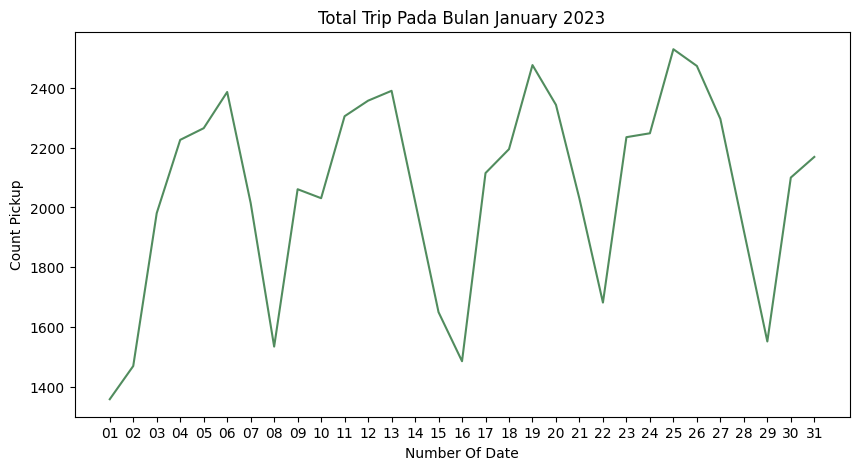

In [410]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=pu_countperday, x='pu_date', y='lpep_pickup_datetime', markers='o', color='#518c5e')
plt.xlabel('Number Of Date')
plt.ylabel('Count Pickup')
plt.title('Total Trip Pada Bulan January 2023')
plt.show()

* Jika dilihat dari total trip di bulan january, dapat diketahui tren trip di setiap tanggal terlihat fluktuatif : 

    - Perlu diberi catatan jika penurunan trip selalu terjadi saat weekend : January tanggal 1 merupakan hari minggu, jika dilihat dari line plot diatas tren menunjukan jika trips akan meningkat jika memasuki weekdays, dan akan kembali turun ketika memasuki weekend. 

In [411]:
# Grouping berdasarkan pu_day, di nama harinya
pu_dayperday = merged_df.groupby('pu_day')[['lpep_pickup_datetime']].count()
pu_dayperday['%'] = (merged_df.groupby('pu_day')[['lpep_pickup_datetime']].count()/len(merged_df))*100
round(pu_dayperday, 2)

,lpep_pickup_datetime,%
pu_day,,
Friday,9415,14.73
Monday,9352,14.63
Saturday,7987,12.50
Sunday,7778,12.17
Thursday,9571,14.98
Tuesday,10544,16.50
Wednesday,9255,14.48


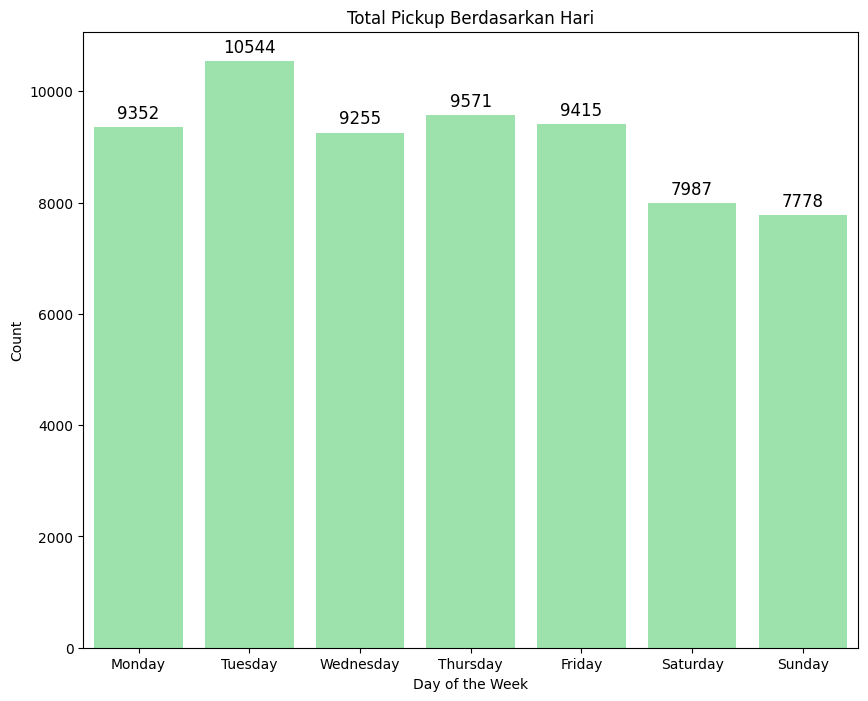

In [412]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


plt.figure(figsize=(10, 8))
ax = sns.barplot(data=pu_dayperday, x='pu_day', y='lpep_pickup_datetime',color= '#91eda5', order=day_order)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Total Pickup Berdasarkan Hari')

# Menambahkan label total count pada setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')


* Berdasarkan barplot diatas, dapat dilihat jika hari paling tinggi terjadinya trip adalah hari selasa dan diikuti dengan hari weekdays lainya.
* Hari paling rendah terjadinya trip adalah hari minggu dengan total 7.778 trip saja dan terendah kedua adalah hari sabtu dengan jumlah 7.987

#### Melihat Total Pickup dan Total Amount berdasarkan Jam 

In [413]:
countper_hour = merged_df.groupby('pu_hour')[['lpep_pickup_datetime']].count()
countper_hour.head()

,lpep_pickup_datetime
pu_hour,
00,1040
01,816
02,585
03,506
04,384


In [414]:
totalPerHour = merged_df.groupby('pu_hour')[['total_amount']].sum().reset_index()
totalPerHour.head()

,pu_hour,total_amount
0,00,22258.62
1,01,18345.75
2,02,14390.91
3,03,12883.32
4,04,10150.68


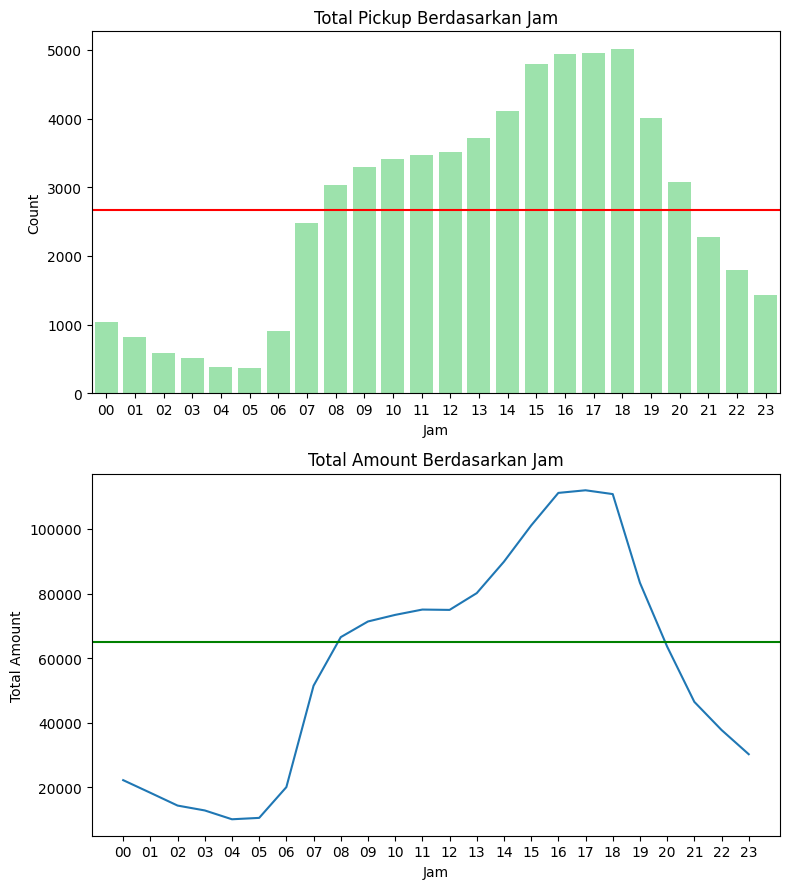

In [415]:
plt.figure(figsize=(8 ,9 ))
plt.subplot(2,1,1)
sns.barplot(data= countper_hour, x = 'pu_hour', y = 'lpep_pickup_datetime', color= '#91eda5' )
plt.xlabel('Jam')
plt.ylabel('Count')
plt.axhline(countper_hour['lpep_pickup_datetime'].mean(), color = 'red')
plt.title('Total Pickup Berdasarkan Jam')

plt.subplot(2,1,2)
sns.lineplot(data= totalPerHour, x= 'pu_hour', y= 'total_amount')
plt.axhline(totalPerHour['total_amount'].median(), color = 'green')
plt.title('Total Amount Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Total Amount')

plt.tight_layout()

* Jika kita lihat, Pickup hour yang paling rendah berada pada jam **12 malam** hingga **5 pagi**
* Pickup hour paling tinggi berada anatara jam **4 sore** hingga **6 sore**, dan mulai turun pada jam **7 malam**
* Dengan begitu, naik atau turunnya total pendapatan juga akan sebanding dengan jam paling sibuk atau tidak sibuknya trip 

#### Melihat Korelasi antara Pickup jam dengan Pickup hari

In [416]:
# Mengecek Korelasi antara pickup day dan pickup hournya 
heat_trips = pd.crosstab(df['pu_hour'],df['pu_day'])
day = {'Monday':0,'Tuesday':1,
        'Wednesday':2,'Thursday':3,
        'Friday':4,'Saturday':5,
        'Sunday':6}
heat_trips = heat_trips.sort_index(key=lambda x: x.map(day))
heat_trips.head()

pu_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
pu_hour,,,,,,,
00,145,116,220,292,92,88,87
01,84,76,185,282,65,56,69
02,42,53,135,235,45,46,32
03,37,68,113,191,31,39,28
04,29,53,86,143,33,22,18


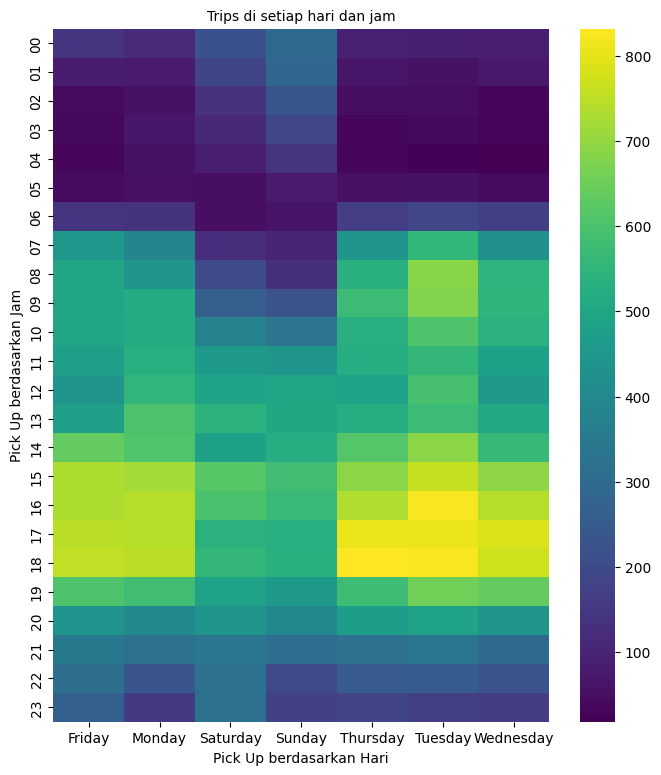

In [417]:
plt.figure(figsize=(8,9))
sns.heatmap(heat_trips, 
            annot_kws={'size':6}, fmt='.0f',
            cmap='viridis')
plt.title('Trips di setiap hari dan jam', size=10)
plt.xlabel('Pick Up berdasarkan Hari')
plt.ylabel('Pick Up berdasarkan Jam')
plt.show()

* Heatmap diatas menunjukan trip meningkat menjadi lebih sibuk dimulai dari jam **3 sore** hingga sekitar jam **7 malam**. Setelah itu, trip mulai berkurang.
* Bisa disimpulkan juga jika pada heatmap tersebut menunjukan korelasi antara jam dan hari pickup, pada hari sabtu dan minggu atau weekend trip akan mulai berkurang khususnya pada waktu dini hari yakni **jam 12 malam** sampai **jam 5 pagi**.

### Total pemasukan berdasarkan Pickup Week

In [418]:
totalAmperday = merged_df.groupby(['pu_week'])[['total_amount']].sum().reset_index().rename(columns= {'pu_week' : 'Week', 'total_amount': 'Total Amount'}).sort_values(by= 'Week')
totalAmperday

,Week,Total Amount
0,01,295763.95
1,02,318800.77
2,03,313401.87
3,04,333131.09
4,05,126925.88


Text(0.5, 1.0, 'Total Amount per minggu')

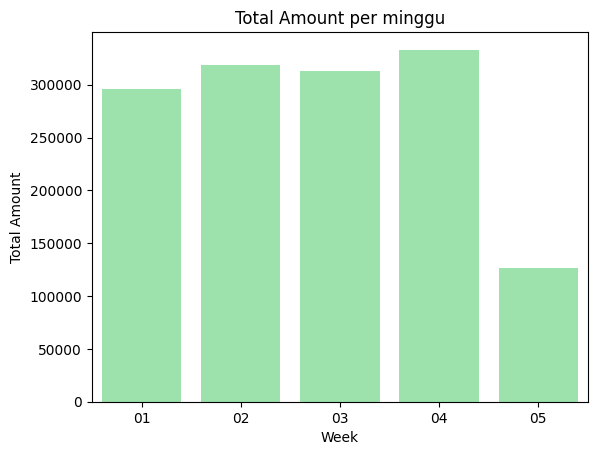

In [419]:
sns.barplot(data= totalAmperday, x= 'Week', y= 'Total Amount', color= '#91eda5')
plt.title('Total Amount per minggu')

* Dengan rata-rata tripnya tersebar di jam orang bekerja dan weekdays saja. Dapat diidentifikasi pendapatan di bulan January berdasarkan week paling tinggi berada pada week ke 4 dan terendah berada pada week ke 5. 
* Minggu ke 5 merupakan trip terendah karena pada bulan Januari minggu ke 5 hanya ada 3 hari di bulan january dibandingkan minggu lainnya.

### Melihat Tipping berdasarkan Jam 

In [420]:
tip_amountHour = merged_df.groupby('pu_hour')[['tip_amount']].median().reset_index().rename(columns= {'pu_hour' : 'Hour', 'tip_amount' : 'Total Tip'})
tip_amountHour 

,Hour,Total Tip
0,00,1.000
1,01,1.800
2,02,1.000
3,03,0.000
4,04,0.000
5,05,0.020
6,06,1.880
7,07,2.000
8,08,1.880
9,09,1.740


Text(0.5, 1.0, 'Tip berdasarkan Jam')

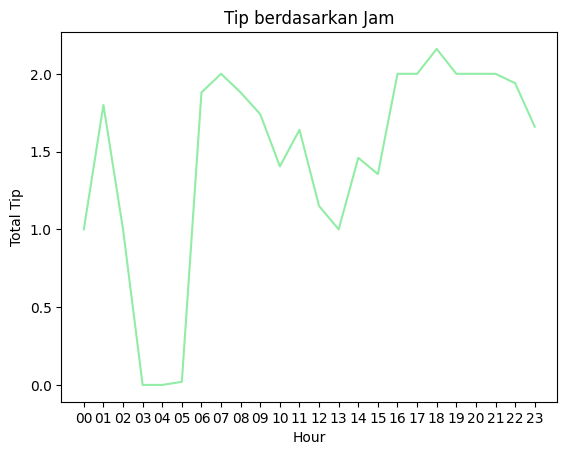

In [421]:
sns.lineplot(data= tip_amountHour , x= 'Hour', y= 'Total Tip', color= '#91eda5')
plt.title('Tip berdasarkan Jam')

* Lineplot diatas berguna untuk melihat tren tipping berdasarkan jam trip. jika diamati, jam waktu pulang kantor atau alias **Mulai dari jam 3 sore hingga jam 9 malam** memiliki median tertinggi dalam pemberian tipping ketika perjalanan telah selesai.
* hal ini menunjukan jika kecenderungan penumpang melakukan tipping berada di sekitar **jam 3 sore hingga jam 9 malam**. 


In [422]:
tip_amountday = merged_df.groupby('pu_day')[['tip_amount']].median().reset_index().rename(columns= {'pu_day' : 'Day', 'tip_amount' : 'Total Tip'})
tip_amountday

,Day,Total Tip
0,Friday,1.66
1,Monday,1.82
2,Saturday,1.80
3,Sunday,2.00
4,Thursday,1.88
5,Tuesday,1.82
6,Wednesday,1.85


Text(0.5, 1.0, 'Tip berdasarkan Hari')

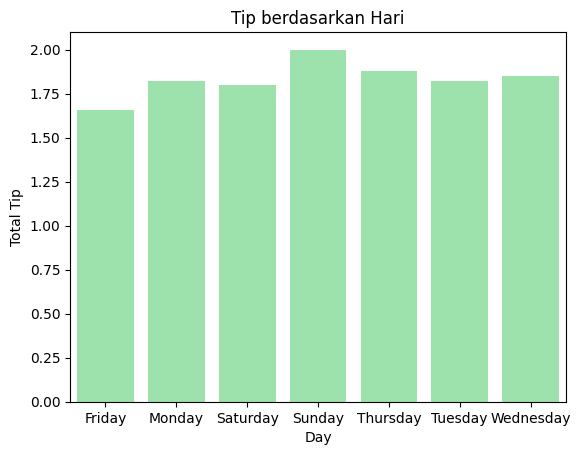

In [423]:
sns.barplot(data= tip_amountday , x= 'Day', y= 'Total Tip', color= '#91eda5')
plt.title('Tip berdasarkan Hari')

* Ada temuan menarik berdasarkan barplot diatas, jika kita lihat berdasarkan tren tipping sebelumnya, yang paling sering melakukan tipping berada pada jam kerja. Namun berdasarkan harinya tipping paling tinggi terjadi di **hari minggu**, dimana hari minggu merupakan **weekend**. 
* hal ini memungkinkan karena hari minggu orang-orang cenderung bersenang-senang setelah weekdays yang panjang. jadi dapat diasumsikan penumpang akan lebih generous melakukan tipping di hari libur.

### Melihat korelasi Tipping Rate berdasarkan hari dan jam 

Untuk melihat bagaimana korelasi persentase tip berdasarkan hari serta jam 

In [424]:
# Membuat kolom tip rate
merged_df['tip_rate'] = ((merged_df['tip_amount'] / merged_df['total_amount']) * 100).round(2)

In [425]:
tip_hourday = pd.crosstab(index= merged_df['pu_day'], columns= merged_df['pu_hour'], values= merged_df['tip_rate'], aggfunc= 'median')
day = {'Monday':0,'Tuesday':1,
        'Wednesday':2,'Thursday':3,
        'Friday':4,'Saturday':5,
        'Sunday':6}
tip_hourday = tip_hourday.sort_index(key=lambda x: x.map(day)).round()
tip_hourday

pu_hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
pu_day,,,,,,,,,,,,,,,,,,,,,
Monday,8.0,0.0,0.0,0.0,0.0,7.0,11.0,10.0,10.0,13.0,...,8.0,9.0,13.0,11.0,13.0,13.0,11.0,10.0,9.0,8.0
Tuesday,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,12.0,10.0,...,6.0,6.0,11.0,12.0,13.0,13.0,13.0,13.0,13.0,13.0
Wednesday,0.0,0.0,0.0,0.0,8.0,2.0,13.0,13.0,13.0,10.0,...,5.0,10.0,9.0,12.0,12.0,12.0,13.0,17.0,11.0,0.0
Thursday,0.0,10.0,0.0,0.0,0.0,0.0,13.0,13.0,10.0,13.0,...,8.0,8.0,9.0,13.0,13.0,13.0,17.0,11.0,12.0,9.0
Friday,0.0,12.0,0.0,0.0,9.0,11.0,9.0,13.0,9.0,9.0,...,5.0,7.0,9.0,11.0,13.0,12.0,13.0,9.0,10.0,12.0
Saturday,13.0,13.0,9.0,8.0,9.0,0.0,0.0,13.0,9.0,5.0,...,13.0,8.0,12.0,10.0,12.0,10.0,13.0,11.0,17.0,11.0
Sunday,10.0,15.0,13.0,13.0,9.0,8.0,11.0,0.0,8.0,8.0,...,13.0,12.0,13.0,15.0,16.0,17.0,13.0,13.0,17.0,8.0


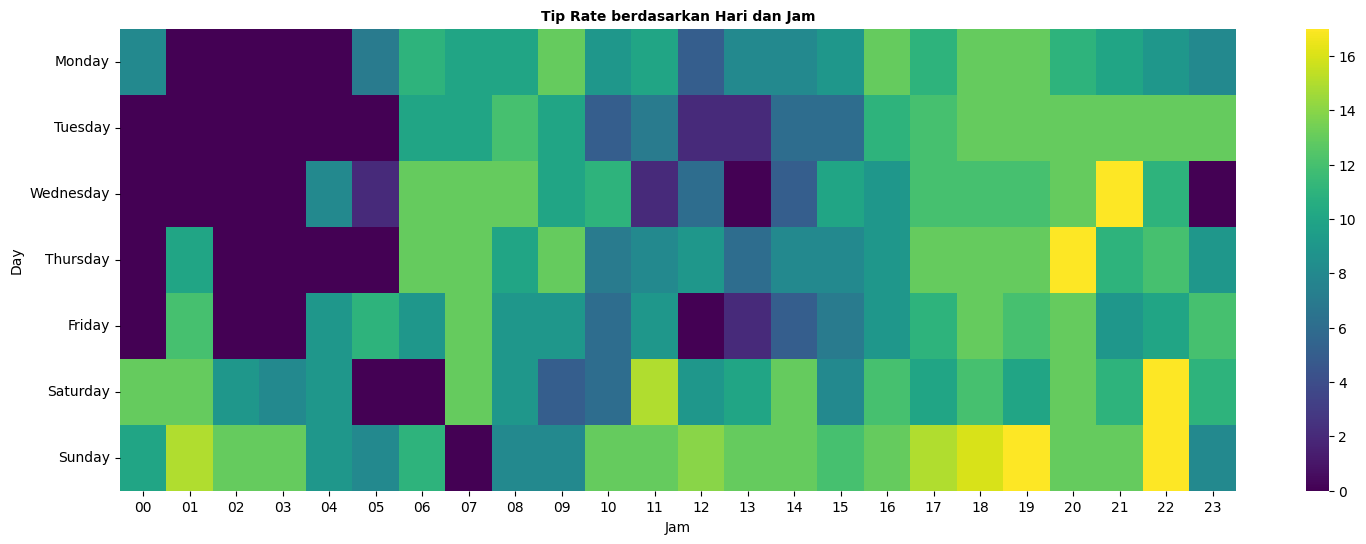

In [426]:
plt.figure(figsize=(18,6))
sns.heatmap(tip_hourday, annot_kws={'size':9}, fmt='.0f', cmap='viridis')
plt.title('Tip Rate berdasarkan Hari dan Jam', size=10,fontweight= 'bold' )
plt.ylabel('Day')
plt.xlabel('Jam')
plt.show()

* Dari heatmap diatas dapat diambil kesimpulan jika tip paling sering terjadi pada jam malam di setiap harinya. 
* Pada saat hari weekend tipping menjadi meningkat, artinya penumpang cenderung melakukan tipping ketika mereka sedang menikmati weekend.
* Pada saat hari weekday khususnya di jam rush hour, penumpang juga menunjukan kecenderungan melakukan tipping. 


### **3.2 Trip Taxi berdasarkan area operasinya**

#### Melihat Daerah tersibuk berdasarkan zona (Burough)

In [427]:
busiestburogh = merged_df.groupby('Borough')[['lpep_pickup_datetime']].count().reset_index().rename(columns= {'lpep_pickup_datetime' : 'Count'}).sort_values(by= 'Count', ascending= False)
busiestburogh

,Borough,Count
2,Manhattan,38277
3,Queens,16391
1,Brooklyn,8373
0,Bronx,853
4,Staten Island,8


In [428]:
# Menghitung jumlah total perjalanan
total_trips = busiestburogh['Count'].sum()

# Menambahkan kolom "Percentage"
busiestburogh['Percentage'] = (busiestburogh['Count'] / total_trips * 100).round(3)

# Tampilkan DataFrame
busiestburogh


,Borough,Count,Percentage
2,Manhattan,38277,59.900
3,Queens,16391,25.650
1,Brooklyn,8373,13.103
0,Bronx,853,1.335
4,Staten Island,8,0.013


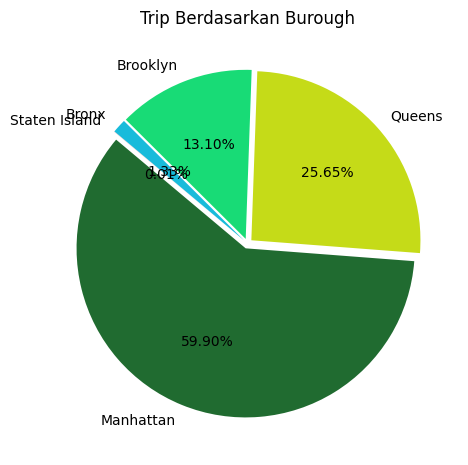

In [429]:
# Data untuk pie plot
labelscount = busiestburogh['Borough']
sizesPercent = busiestburogh['Percentage']
explode = (0.03, 0.03, 0.03, 0.03, 0.03)  # Opsional: pecahkan potongan tertentu dari pie (dalam contoh ini, 0.1)

# Warna untuk setiap potongan pie (opsional)
colors = ['#206b30', '#c5db18', '#18db76', '#18bbdb', '#c75858', '#5a58c7']

plt.figure(figsize=(12, 6))  # Tentukan ukuran gambar (satu gambar)
plt.subplot(1, 2, 1)
plt.pie(sizesPercent, explode=explode, labels=labelscount, colors=colors, autopct='%2.2f%%', startangle=140)
plt.title('Trip Berdasarkan Burough')

# Tampilkan pie plot
plt.show()


* Berdasarkan pie chart diatas dapat disimpulkan jika proporsi trip yang paling sering atau paling sibuk terjadi di Manhattan. Hal tersebut terjadi karena manhattan merupakan pusat perkatoran yang dimana pada jam jam kerja dan hari weekdays pasti akan lebih ramai dan padat.
* jika dilihat lebih dalam lagi, perjalanan yang sering dilakukan berada pada Manhattan, Queens, Brooklyn dengan total hampir 99 persen, hal tersebut dapat diwajari karena memang pusat kota New york, seperti perkatoran, dan kemajuan fasilitas berada di salah satu Burough tersebut.
* Dan jika dilihat dari persentase diatas 3 daerah terbesar tersebut terlihat mengutamakan taxi sebagai alat transportasi mereka.

In [430]:
zone_busiest = merged_df.groupby(['Zone','Borough'])['pu_day'].count().reset_index().sort_values(by= 'pu_day', ascending = False).rename(columns={'pu_day':'number of trips'}).head(10)
zone_busiest

,Zone,Borough,number of trips
55,East Harlem North,Manhattan,12890
56,East Harlem South,Manhattan,8870
30,Central Harlem,Manhattan,3913
115,Morningside Heights,Manhattan,3817
71,Forest Hills,Queens,3663
32,Central Park,Manhattan,2834
62,Elmhurst,Queens,2813
72,Fort Greene,Brooklyn,2118
174,Washington Heights South,Manhattan,1769
1,Astoria,Queens,1751


Text(0.5, 1.0, 'Trip berdasarkan Zona')

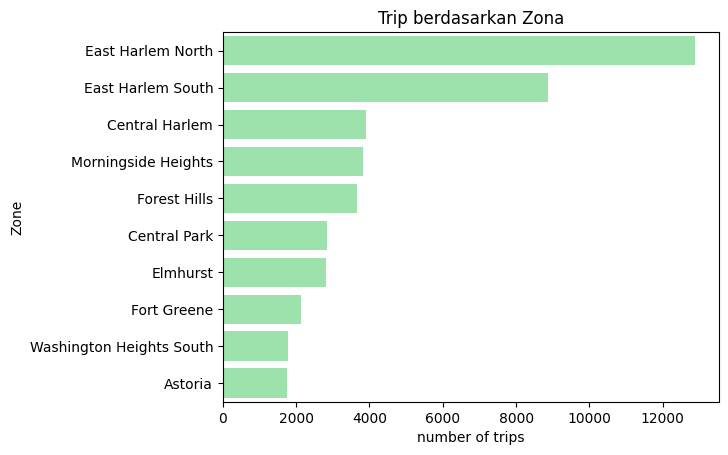

In [431]:
# Melihat Trip tersibuk berdasarkan zonanya
sns.barplot(data= zone_busiest, x = 'number of trips', y= 'Zone', color= '#91eda5')
plt.title('Trip berdasarkan Zona')

* Dapat disimpulkan jika zona paling ramai terjadinya trip berada di Borough Manhattan tepatnya di daerah East Harlem North, East Harlem north sendiri merupakan tempat berbagai fasilitas komunitas, sekolah, gereja, toko kelontong, dan bisnis lokal yang mendukung kehidupan sehari-hari penduduk di daerah tersebut (Wikipedia).

### Melihat Bagaimana Trip Level Berdasarkan Borough

In [432]:
triplvl_total = merged_df.groupby('trip_level')[['total_amount']].count().reset_index().rename(columns= {'total_amount' : 'Total Trips'})
triplvl_total

,trip_level,Total Trips
0,long,8591
1,medium,22258
2,short,33053


In [433]:
trip_level_borough = merged_df.groupby('Borough')['trip_level'].value_counts().reset_index(name= 'number of trips')
trip_level_borough

,Borough,trip_level,number of trips
0,Bronx,medium,361
1,Bronx,short,289
2,Bronx,long,203
3,Brooklyn,short,3345
4,Brooklyn,medium,3202
5,Brooklyn,long,1826
6,Manhattan,short,21418
7,Manhattan,medium,12851
8,Manhattan,long,4008
9,Queens,short,7996


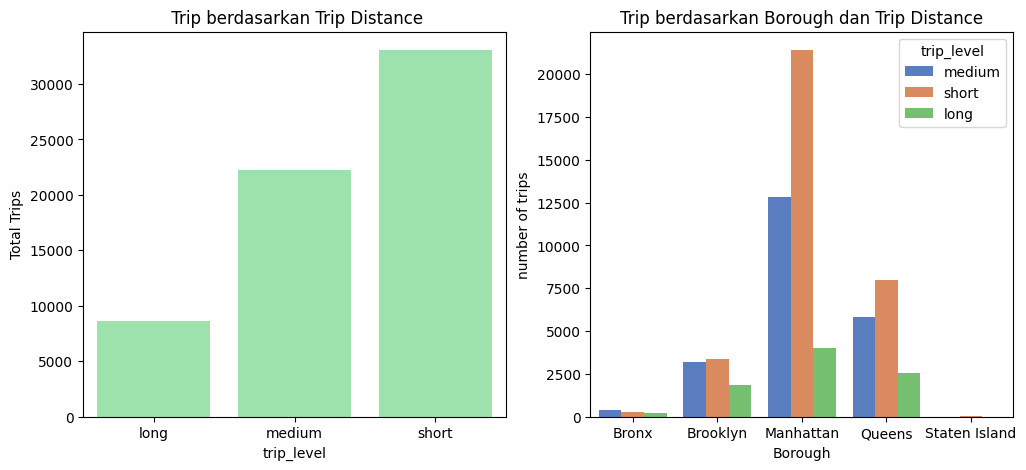

In [434]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.barplot(data= triplvl_total, x= 'trip_level',
y= 'Total Trips', palette = ['#91eda5'], ax= axes[0])
axes[0].set_title(' Trip berdasarkan Trip Distance')

sns.barplot(data= trip_level_borough,
            x= 'Borough', y= 'number of trips',
            hue= 'trip_level', palette= 'muted', ax= axes[1])
axes[1].set_title('Trip berdasarkan Borough dan Trip Distance')
plt.show()

* Grafik pertama menunjukan seluruh total trip dalam data yang dikaegorikan ke 3 level yakni long, medium dan, short. Total trip yang paling sering terjadi adalah trip dengan level **short** atau pendek.
* Untuk melihat lebih dalam lagi bagaimana sebaran data total trip, saya membagi total trip level berdasarkan Borough nya.

    - jika dilihat kembali Trip level **short** tertinggi berada di borough Manhattan. 

#### Tip berdasarkan Borough

In [435]:
# Rata-rata Tipping yang dilakukan berdasarkan Borough 
tip_behave = merged_df.groupby(['Borough'])[['tip_amount']].median()
tip_behave = tip_behave.reset_index()
tip_behave

,Borough,tip_amount
0,Bronx,0.00
1,Brooklyn,2.46
2,Manhattan,2.00
3,Queens,0.00
4,Staten Island,1.00


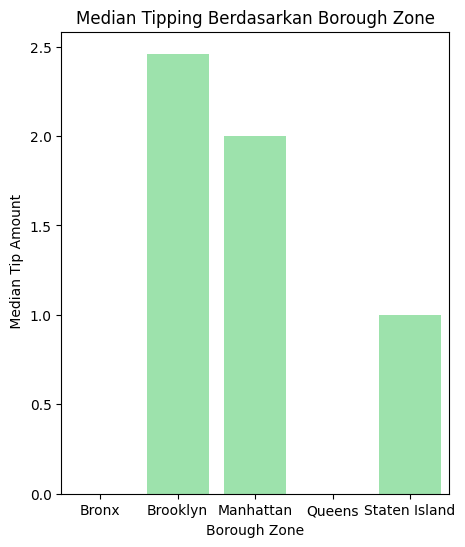

In [436]:
plt.figure(figsize=(5, 6))
sns.barplot(data = tip_behave, x = 'Borough', y = 'tip_amount', color= '#91eda5' )

plt.xlabel('Borough Zone')
plt.ylabel(' Median Tip Amount')
plt.title('Median Tipping Berdasarkan Borough Zone')
plt.show()

* Barplot diatas berguna untuk melihat median tipping berdasarkan zona Borough. jika diamati, Brooklyn memiliki median tertinggi dalam pemberian tipping ketika perjalanan telah selesai. median tipping tertinggi yang kedua merupakan Manhattan. 
* Brooklyn secara total trip berada di urutan ketiga setelah Manhattan dan Queens. Hal ini menunjukan jika orang-orang brooklyn lebih sering memberikan tip sebesar **$2.46** dari pada lainnya.
* untuk Queens yang memiliki total trip kedua tertinggi, jika dilihat dari tippingnya mereka cenderung tidak memberikan tip atas layanan taksi yang dipesan

#### Melihat Korelasi antara Trip distance Tip Amount
Apakah dengan trip distance yang semakin panjang para penumpang akan semakin memberikan tip yang besar pula ?

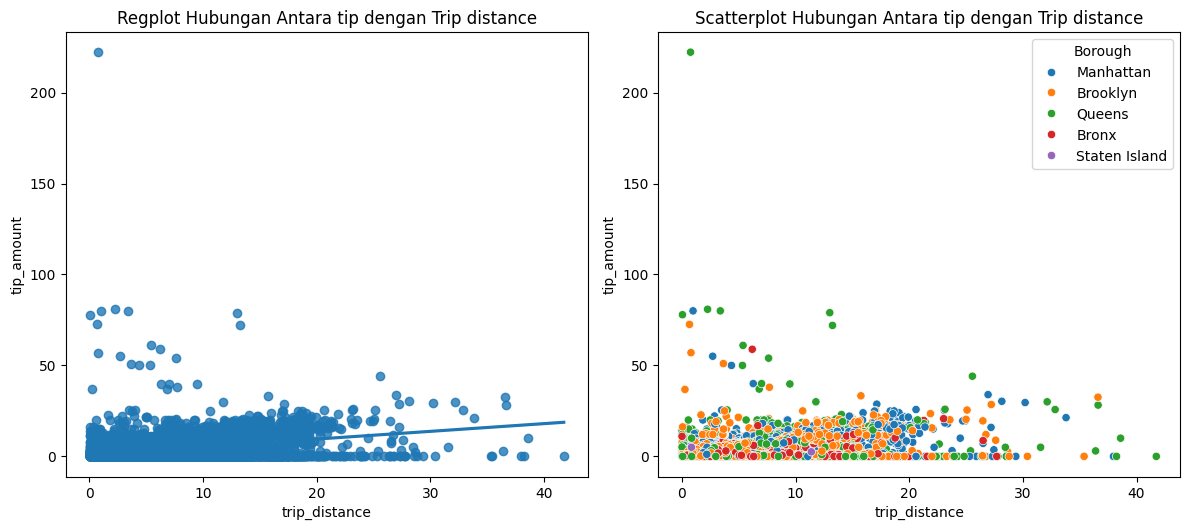

In [437]:
plt.figure(figsize= (12,10))
plt.subplot(2,2,1)
sns.regplot(data = merged_df, x = 'trip_distance', y =  "tip_amount" )
plt.title("Regplot Hubungan Antara tip dengan Trip distance")

plt.subplot(2,2,2)
sns.scatterplot(data = merged_df, x = 'trip_distance', y =  "tip_amount", hue = "Borough")
plt.title("Scatterplot Hubungan Antara tip dengan Trip distance")

plt.tight_layout()
plt.show()

In [438]:
# Menunjukan korelasi antara trip distance dengan tip amount
merged_df[['trip_distance', 'tip_amount']].corr(method='spearman')

,trip_distance,tip_amount
trip_distance,1.000000,0.300034
tip_amount,0.300034,1.000000


* Dapat dilihat jika korelasi antara trip distance dan tip amount memiliki arah korelasi positif tetapi kekuatan korelasi nya lemah, jadi dapat diartikan trip distance tidak sesignifikan itu untuk mempengaruhi penumpang dalam memberi tip. bisa diasumsikan kondisi tip tidak hanya bisa dilihat dari trip distance saja, tetapi dari kepuasan penumpang dengan layanan, atau kecepatan driver mengantar sampai ke tujuan.

### Mebuat Tipping Rate berdasarkan Borough 

Pembuatan tipping rate berdasarkan Boroughnya guna melihat apakah dari masing-masing borough memiliki perbedaan dengan tip amount di setiap Boroughnya

In [439]:
# Kolom Tip Rate berdasarkan Buroughnya
tip_rate_borough = merged_df.groupby('Borough')['tip_rate'].median().reset_index()
tip_rate_borough

,Borough,tip_rate
0,Bronx,0.000
1,Brooklyn,16.440
2,Manhattan,13.040
3,Queens,0.000
4,Staten Island,1.695


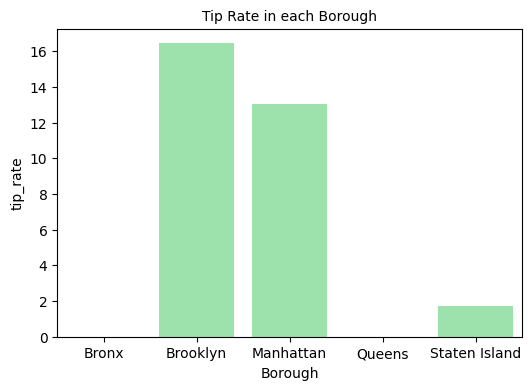

In [440]:
plt.figure(figsize=(6,4))
plt.title('Tip Rate in each Borough', size = 10)
sns.barplot(x= 'Borough', y= 'tip_rate', 
            color= '#91eda5', data=tip_rate_borough)
plt.show()

* Berdasarkan Tipping rate diatas menunjukan jika Brooklyn merupakan daerah yang sering memberikan tip dengan persentase **16%** diikuti dengan Manhattan **13%**
* Perlu digaris bawahi tipping rate di atas 10% dari total amount merupakan tip yang besar. jadi dapat dimasukan rekomendasi untuk meningkatkan revenue dari para driver sebagai bentuk pengoptimalan sebaran armada taxi. 

### Melihat Borough paling sering memberi tip jika dilihat berdasarkan harinya

In [469]:
count_tip_per_borough = pd.crosstab(index= merged_df['Borough'], columns= merged_df['pu_day'], values= merged_df['tip_rate'], aggfunc= 'median')
count_tip_per_borough

pu_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Borough,,,,,,,
Bronx,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Brooklyn,14.42,15.02,16.66,16.66,13.04,13.07,13.06
Manhattan,12.50,13.04,13.03,14.93,13.05,13.02,13.05
Queens,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Staten Island,0.00,38.46,NaN,NaN,NaN,16.67,0.00


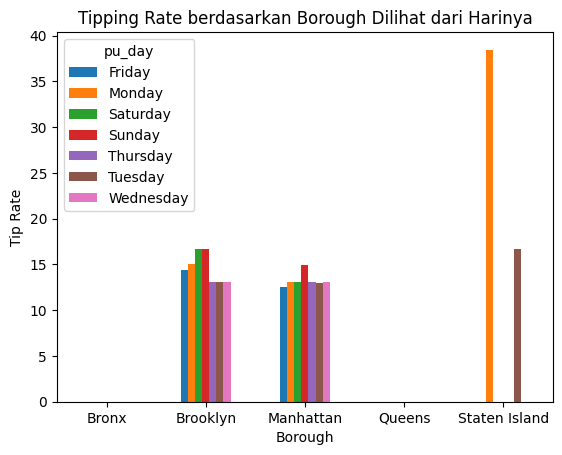

In [483]:
count_tip_per_borough.plot(kind= 'bar')
plt.title('Tipping Rate berdasarkan Borough Dilihat dari Harinya')
plt.ylabel('Tip Rate')
plt.xticks(rotation = 0)
plt.show()

* jika diidentifikasi lebih dalam dengan membandingkan tipping rate pada borough Brooklyn dan manhattan saja, pada hari weekend di Brooklyn Tip akan meningkat dibanding hari-hari weekdays. weekend merupakan hari santai dimana orang-orang cenderung menikmati waktu berlibur.
* Bisa diasumsikan penumpang brooklyn yang menggunakan taxi di weekend lebih cenderung memberikan tip karena kondisi hari weekend ini banyak wisatawan yang menikmati brooklyn.

NOTE : perlu data yang lebih akurat untuk memahami perilaku tipping di brooklyn.

### Total Pendapatan setiap Trip berdasarkan Burough

In [441]:
total_amountBo = merged_df.groupby('Borough')[['total_amount']].sum().reset_index().rename(columns= {'total_amount' : 'Total Amount'}).sort_values(by= 'Total Amount', ascending= False)
total_amountBo

,Borough,Total Amount
2,Manhattan,790393.16
3,Queens,356452.61
1,Brooklyn,220347.08
0,Bronx,20633.85
4,Staten Island,196.86


<Axes: xlabel='Borough', ylabel='Total Amount'>

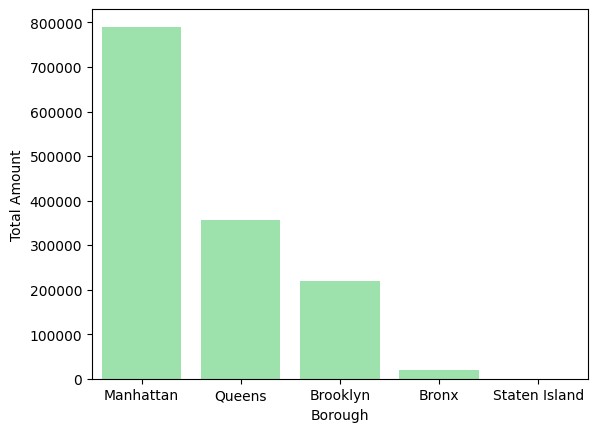

In [442]:
sns.barplot(data= total_amountBo, x = 'Borough', y= 'Total Amount', color= '#91eda5')

* Berdasarkan Total Amount per borough nya pendapatan yang paling tertinggi berada di daerah Manhattan **$790,393**
 Hal ini bisa diwajari karena memang daerah ini merupakan daerah yang paling sering terjadinya trip. 
* disusul dengan queens dan brooklyn. 

### sekarang kita melihat bagaimana median disetiap total amount di setiap borough

In [443]:
mean_total_bo = merged_df.groupby('Borough')[['total_amount']].median().reset_index().rename(columns= {'total_amount' : 'Median'}).sort_values(by= 'Median', ascending= False)
mean_total_bo

,Borough,Median
1,Brooklyn,21.70
0,Bronx,19.75
2,Manhattan,17.55
3,Queens,17.32
4,Staten Island,14.78


<Axes: xlabel='Borough', ylabel='Median'>

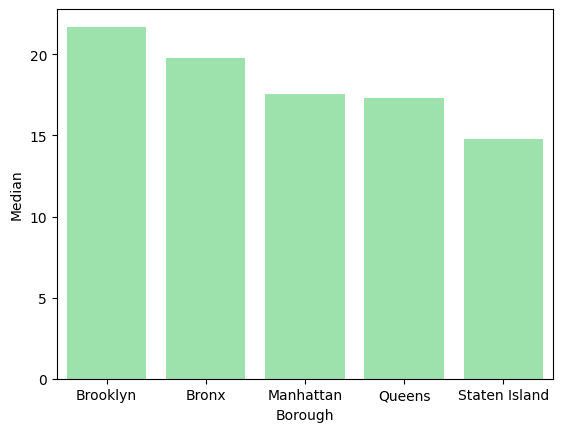

In [444]:
sns.barplot(data= mean_total_bo, x = 'Borough', y= 'Median', color= '#91eda5' )

* jika kita identifikasi lebih dalam... Secara median pendapatan tertinggi berada pada borough **Brooklyn** dengan sekitar **$21.70**

### Map Borough Tersibuk yang dilihat dari aktivitas pemesanan taksi

In [445]:
df_map = merged_df.groupby('Borough').size().reset_index(name= 'Count')
df_map

,Borough,Count
0,Bronx,853
1,Brooklyn,8373
2,Manhattan,38277
3,Queens,16391
4,Staten Island,8


In [484]:
# buat peta newyork
import folium
newyork_map = folium.Map(location=[40.71536549440151, -74.0057074893691],
                         zoom_start=10)

newyork_map

# choropleth
chor_borough = folium.Choropleth(geo_data=r'new-york-city-boroughs.geojson',
                  data=df_map,
                  columns=['Borough','Count'],
                  key_on='feature.properties.name',
                  fill_color='YlGn',
                  fill_opacity=0.8,
                  line_opacity=0.9)

borough_marker = folium.Marker(location=[40.776901885862, -73.96865736025023],
                               tooltip=df_map[df_map['Count']==df_map['Count'].max()]['Borough'].values[0],
                               popup='Transaksi Terbanyak',)

# memasukkan choropleth ke map
chor_borough.add_to(newyork_map)
borough_marker.add_to(newyork_map)


title_html = """
<h3 align="center" style="font-size:16px"><b>Distribution of Most Trip Berdasarkan Borough</b></h3>
"""

# Embed the title HTML content within the map
newyork_map.get_root().html.add_child(folium.Element(title_html))

# tampilkan
newyork_map


## **Conclusion and Recomendation**

### Conclusion 

Berdasarkan analisis data diatas, kesimpulan yang dapat diambil adalah : 

* Pada bulan january ini trip taxi terlihat fluktuatif.
* Hari operasi taxi umumnya paling ramai berada di weekdays. 
* Jumlah trip mulai mengalami penurunan ketika mendekati hari-hari weekend.
* Mayoritas penumpang melakukan trip hanya untuk trip pendek saja. 
* Secara kuantitas pendapatan TLC weekdays lebih tinggi dibandingkan weekend khususnya pada hari selasa, hal ini dipengaruhi oleh meningkatnya trip dimulai dari jam **3 sore** hingga sekitar jam **7 malam**, yang dimana jam tersebut merupakan rush hour dan tipe perjalanannya pendek. 
* Secara keseluruhan, terlihat jika trip taksi sangat dikhususkan pada Borough Manhattan, diikuti dengan Queens dan Brooklyn. Dapat disimpulkan jika Orang-orang Manhattan cenderung lebih sering menggunakan taxi sebagai alat transportasi mereka dibanding dengan Borough lainya. 
* Diantara semua Borough di New York, Brooklyn merupakan daerah yang penumpangnya sering dalam memberikan tipping ketika perjalanan telah selesai. Tertinggi yang kedua merupakan Manhattan. Secara total trip Brooklyn berada di urutan ketiga setelah Manhattan dan Queens. Namun penumpang di Brooklyn lebih sering memberikan tip dari pada penumpang Manhattan dan Queens khususnya hari weekend (sabtu dan minggu). ditambah lagi dengan korelasi pemberian tip berdasarkan trip distance tidak seberapa kuat. Perjalanan jauh maupun pendek tidak mempengaruhi penumpang dalam tipping. Pada kesimpulan ini hanya menjelaskan penumpang dari borough mana yang paling sering memberikan tip.


### Recomendation 
 
* Karena hari operasi taxi umumnya paling ramai pada weekdays, sebaiknya TLC dapat menyesuaikan jumlah armada dan driver mereka untuk memaksimalkan pelayanan selama periode ini. Dengan begitu waktu tunggu pelanggan jadi semakin cepat sehingga mampu meningkatkan pendapatan.

* Untuk keefektifan, armada taksi harus tersedia terlebih dahulu sekitar 1-2 jam sebelum jam sibuk, terutama di Manhattan pada hari Selasa.

* Dengan mayoritas perjalanan berlokasi di Manhattan, utamakan Borough Manhattan untuk diberikan layanan terbaik atau pengalaman perjalanan yang nyaman, sehingga mereka akan memberikan bonus berupa tip. Karena berdasarkan analisis trip yang berada di Manhattan masih sangat kurang dalam memberikan tip. 

* Jika dilihat dari hubungan korelasi yang lemah antara trip distance dan tip nya, perlunya pertimbangan dalam mengedukasi para driver untuk melayani dengan baik dan ramah. Hal tersebut dapat menjadi acuan untuk mengembangkan loyalitas para pengguna TLC. 

* Pemaksimalan pelayanan dan armada juga perlu difokuskan pada Brooklyn khususnya hari weekend (sabtu dan minggu), karena brooklyn cenderung memberikan tip yang tinggi. 

Secara keseluruhan rekomendasi mungkin akan berpengaruh untuk meningkatkan pendapatan jika TLC sudah melakukan pengoptimalan armada serta layanan taksi mereka.

*Perlu diketahui jika data hanya berisikan record perjalanan pada bulan January 2023 saja.* *Jadi untuk analisis lebih dalam mengenai trend perlu rentang data yang lebih panjang pula.*

